# Introduction
Hotel price is allocated depending on perishable assets, room, the relation of demand and supply, thus pricing is the most complicated process. 
The hotel will lose much revenue if price charges over fair market prices and results in miss potential customers. It is often caused by dynamic pricing problems. It is imperative to collect real-time data and track current market trends in order to provide optimal hotel prices. However, the pricing methods that are often conducted based on the experience and knowledge of revenue managers or employees are inefficient and unreliable (Baker, Eziz, and Harrington, 2020). Hence, the price prediction model developed based on the analysis of the market and competitors will provide the best opportunity to maximize profits.

To archive the aim of this research, the below objectives are assigned as milestones:
- To identify significant features for developing an accurate prediction model
- To develop well-trained machine learning and deep learning algorithm, do pre-process, do feature engineering, and transform the dataset into a suitable format 
- To evaluate the performance of the prediction model using different algorithms

# Data Collection

The used dataset for this project consists of hotel data in Las Vegas collected by Ou (2019). He ran beautifulsoup and selenium in parallell and obtained hotel information from Hotels.com for three months from November 2019 to January 2020. 

Source link: https://github.com/BentleyOu/Projects/tree/master/Hotel%20Price%20Prediction

The dataset contains a list of 15897 hotels and 31 variables that describe the characteristics of the hotel. 
The data haven't been processed yet in this step. 
This secondary dataset contains character and integer data.
Some of the variables related to amenities are represented by 1 or 0 as binary.

# Prepare the dataset

In [1]:
import pickle        
import base64
import csv

df = pickle.loads(open('/Users/sakanashishunsuke/OneDrive - Asia Pacific University/2_Semester/CP1/Development/hotel_df.pkl', 'rb').read())
#with open('/Users/sakanashishunsuke/OneDrive - Asia Pacific University/2_Semester/CP1/Development/output.csv', 'a', encoding='utf8') as csv_file:
    #wr = csv.writer(csv_file, delimiter='|')
    #pickle_bytes = pickle.dumps(df)            # unsafe to write
    #b64_bytes = base64.b64encode(pickle_bytes)  # safe to write but still bytes
    #b64_str = b64_bytes.decode('utf8')          # safe and in utf8
    #wr.writerow(['col1', 'col2', b64_str])


# Initial Exploratory Data Analysis 

# Dataset Description

- name - Hotel name
- address - Hotel address
- hotel_details - describes the hotel containg the location data
- review_box - describes the hotel containg the location data and reviews
- price - Hotel room price/rate
- Checkin - the date of checkin
- Checkout - the date of checkout
- Adults - room capacity for adults
- Children - room capacity for children
- distance_city_center - distance from the city center (miles)
- distance_convention_center - distance from the conventio center (miles)
- zip_code - zip code
- street_name - name of street
- amenities - List of ammenities
- hotel_ratings - ratings from hotels.com
- hotel_reviews - reviews from hotels.com
- hotel_num_guest_reviews - the number of reveiws from guests
- num_ta_reviews - the number of reviews from TripAdvisor
- ta_reviews - ratings from TripAdvisor
- slashed_price - Original price obtained from 'price' attribute
- sales_price - sale price obtained from 'price' attreibute
- Checkin_Day - checkin day of week
- Checkout_Day - checkout day of week
- When_in_Week - weekday or weekend
- parking - parking exists:1, not: 0
- pool - pool exists:1, not: 0
- gym - gym exists:1, not: 0
- air_conditioning - ari_conditioning exists:1, not: 0
- pet_friendly - accept pet exists:1, not: 0
- kitchen- kitchen exists:1, not: 0
- airport_transfer - airport transfer service exists:1, not: 0

In [2]:
# check the number of observations and attributes
print(df.shape)

print('\n')
# check missing values
print(df.info())

(15897, 31)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15897 entries, 0 to 19952
Data columns (total 31 columns):
name                          15897 non-null object
address                       15897 non-null object
hotel_details                 15897 non-null object
review_box                    15897 non-null object
price                         15897 non-null object
Checkin                       15897 non-null object
Checkout                      15897 non-null object
Adults                        15897 non-null float64
Children                      15897 non-null float64
distance_city_center          15897 non-null float64
distance_convention_center    15897 non-null float64
zip_code                      15897 non-null object
street_name                   15897 non-null object
amenities                     15897 non-null object
hotel_rating                  15897 non-null object
hotel_reviews                 15897 non-null float64
hotel_num_guest_reviews       15897 non-

In [3]:
df.isnull().sum()

name                          0
address                       0
hotel_details                 0
review_box                    0
price                         0
Checkin                       0
Checkout                      0
Adults                        0
Children                      0
distance_city_center          0
distance_convention_center    0
zip_code                      0
street_name                   0
amenities                     0
hotel_rating                  0
hotel_reviews                 0
hotel_num_guest_reviews       0
num_ta_reviews                0
ta_reviews                    0
slashed_price                 0
sales_price                   0
Checkin_Day                   0
Checkout_Day                  0
When_in_Week                  0
parking                       0
pool                          0
gym                           0
air_conditioning              0
pet_friendly                  0
kitchen                       0
airport_transfer              0
dtype: i

- There are no missing values.

## Understand the data

In [4]:
import pandas as pd
pd.set_option('display.max_columns', 50)
df.head()

,name,address,hotel_details,review_box,price,Checkin,Checkout,Adults,Children,distance_city_center,distance_convention_center,zip_code,street_name,amenities,hotel_rating,hotel_reviews,hotel_num_guest_reviews,num_ta_reviews,ta_reviews,slashed_price,sales_price,Checkin_Day,Checkout_Day,When_in_Week,parking,pool,gym,air_conditioning,pet_friendly,kitchen,airport_transfer
0,Sam's Town Hotel & Gambling Hall,"5111 Boulder Hwy, Las Vegas, NV, 89122, United...",Las Vegas6.2 miles to City center5.3 miles to ...,Las Vegas6.2 miles to City center5.3 miles to ...,$115$86nightly price per roomThis is the avera...,2019-11-01,2019-11-03,2.0,2.0,6.2,5.3,89122,Boulder Hwy,parkingPoolGymAir Conditioning,Fabulous,8.6,2339.0,2114.0,4.0,115.0,86.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0
1,JW Marriott Las Vegas Resort & Spa,"221 N Rampart Blvd, Las Vegas, NV, 89144, Unit...",Summerlin7.6 miles to City center8.1 miles to ...,Summerlin7.6 miles to City center8.1 miles to ...,Great Rate*The price comparison is based on pr...,2019-11-01,2019-11-03,2.0,2.0,7.6,8.1,89144,N Rampart Blvd,parkingPoolGymAir Conditioning,No Rating,8.8,312.0,2316.0,4.0,349.0,199.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0
2,TI - Treasure Island Hotel and Casino,"3300 Las Vegas Blvd S, Las Vegas, NV, 89109, U...",Las Vegas Strip0.6 miles to City center1.2 mil...,Las Vegas Strip0.6 miles to City center1.2 mil...,Special DealSave 24%$262$184nightly price per ...,2019-11-01,2019-11-03,2.0,2.0,0.6,1.2,89109,Las Vegas Blvd S,parkingPoolGymAir Conditioning,Very Good,8.2,18827.0,16513.0,4.0,262.0,184.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0
4,Eastside Cannery Casino & Hotel,"5255 Boulder Hwy, Las Vegas, NV, 89122, United...",Las Vegas6.4 miles to City center5.5 miles to ...,Las Vegas6.4 miles to City center5.5 miles to ...,Special DealSave 25%$99$74nightly price per ro...,2019-11-01,2019-11-03,2.0,2.0,6.4,5.5,89122,Boulder Hwy,Parking availablePoolGymAir Conditioning,Very Good,8.4,2588.0,871.0,4.0,99.0,74.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0
5,The Orleans Hotel & Casino,"4500 W Tropicana Ave, Las Vegas, NV, 89103, Un...",Las Vegas1.9 miles to City center3.4 miles to ...,Las Vegas1.9 miles to City center3.4 miles to ...,Special DealFlash sale: save 40%$260$156nightl...,2019-11-01,2019-11-03,2.0,2.0,1.9,3.4,89103,W Tropicana Ave,parkingPoolGymAir Conditioning,Very Good,8.4,3870.0,6521.0,4.0,260.0,156.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0


In [5]:
df.tail()

,name,address,hotel_details,review_box,price,Checkin,Checkout,Adults,Children,distance_city_center,distance_convention_center,zip_code,street_name,amenities,hotel_rating,hotel_reviews,hotel_num_guest_reviews,num_ta_reviews,ta_reviews,slashed_price,sales_price,Checkin_Day,Checkout_Day,When_in_Week,parking,pool,gym,air_conditioning,pet_friendly,kitchen,airport_transfer
19937,Desert Moon Motel,"1701 Fremont Street, Las Vegas, NV, 89101, Uni...",Downtown Las Vegas4.3 miles to City center2.6 ...,Downtown Las Vegas4.3 miles to City center2.6 ...,We have 1 left at$299nightly price per roomThi...,2020-01-10,2020-01-12,2.0,0.0,4.3,2.6,89101,Fremont Street,parkingPet-friendly,No Rating,4.8,29.0,12.0,4.5,299.0,299.0,Friday,Sunday,Weekend,1,0,0,0,1,0,0
19942,Hyatt Place Las Vegas at Silverton Village,"8380 Dean Martin Drive, Las Vegas, NV, 89139, ...",Las Vegas4.9 miles to City center6.3 miles to ...,Las Vegas4.9 miles to City center6.3 miles to ...,Great Rate*The price comparison is based on pr...,2020-01-10,2020-01-12,2.0,0.0,4.9,6.3,89139,Dean Martin Drive,parkingPoolPet-friendlyGymAir Conditioning,Exceptional,9.6,19.0,28.0,4.5,244.0,116.0,Friday,Sunday,Weekend,1,1,1,1,1,0,0
19943,Traveler's Bed & Breakfast Hostel,"1502 South Las Vegas Boulevard, Las Vegas, NV,...",Las Vegas2.9 miles to City center1.5 miles to ...,Las Vegas2.9 miles to City center1.5 miles to ...,$124nightly price per roomThis is the average ...,2020-01-10,2020-01-12,2.0,0.0,2.9,1.5,89104,South Las Vegas Boulevard,parkingAir Conditioning,No Rating,4.8,42.0,10.0,2.5,124.0,124.0,Friday,Sunday,Weekend,1,0,0,1,0,0,0
19944,Residence Inn by Marriott Las Vegas South/Hend...,"3225 SAINT ROSE PARKWAY, Henderson, NV, 89052,...",Henderson8.6 miles to City center9.5 miles to ...,Henderson8.6 miles to City center9.5 miles to ...,Great Rate*The price comparison is based on pr...,2020-01-10,2020-01-12,2.0,0.0,8.6,9.5,89052,SAINT ROSE PARKWAY,parkingPoolPet-friendlyAirport transferGymKitc...,Superb,9.2,43.0,2.0,5.0,269.0,161.0,Friday,Sunday,Weekend,1,1,1,1,1,1,1
19952,Grandview Hotel Suites Las Vegas,"9940 South Las Vegas Blvd, Las Vegas, NV, 8918...",Las Vegas7.3 miles to City center8.6 miles to ...,Las Vegas7.3 miles to City center8.6 miles to ...,Special DealSpecial deal: save 25%$399$299nigh...,2020-01-10,2020-01-12,2.0,0.0,7.3,8.6,89183,South Las Vegas Blvd,parkingPoolAirport transferGym,Exceptional,10.0,2.0,4295.0,4.0,399.0,299.0,Friday,Sunday,Weekend,1,1,1,0,0,0,1


In [6]:
pd.set_option("display.max_colwidth", 1000)
df[['hotel_details', 'review_box']].head()

,hotel_details,review_box
0,"Las Vegas6.2 miles to City center5.3 miles to Las Vegas Convention CenterCollect nightsCollect 10 nights, get 1 free* with Hotels.com® RewardsFree parkingPoolGymAir Conditioning","Las Vegas6.2 miles to City center5.3 miles to Las Vegas Convention CenterCollect nightsCollect 10 nights, get 1 free* with Hotels.com® RewardsFree parkingPoolGymAir ConditioningFabulous 8.62,339 reviews2,339 Hotels.com guest reviewsTripAdvisor Traveller Rating: 42,114 reviews"
1,"Summerlin7.6 miles to City center8.1 miles to Las Vegas Convention CenterCollect nightsCollect 10 nights, get 1 free* with Hotels.com® RewardsFree parkingPoolGymAir Conditioning","Summerlin7.6 miles to City center8.1 miles to Las Vegas Convention CenterCollect nightsCollect 10 nights, get 1 free* with Hotels.com® RewardsFree parkingPoolGymAir ConditioningFabulous 8.8312 reviews312 Hotels.com guest reviewsTripAdvisor Traveller Rating: 42,316 reviewsParadise Awaits in Las VegasFree shuttle to the strip. Our resort includes ten on-site dining options, tranquil spa, golf, pool with waterfalls and more."
2,"Las Vegas Strip0.6 miles to City center1.2 miles to Las Vegas Convention CenterCollect nightsCollect 10 nights, get 1 free* with Hotels.com® RewardsFree parkingPoolGymAir Conditioning","Las Vegas Strip0.6 miles to City center1.2 miles to Las Vegas Convention CenterCollect nightsCollect 10 nights, get 1 free* with Hotels.com® RewardsFree parkingPoolGymAir ConditioningVery Good 8.218,827 reviews18,827 Hotels.com guest reviewsTripAdvisor Traveller Rating: 416,513 reviews"
4,"Las Vegas6.4 miles to City center5.5 miles to Las Vegas Convention CenterCollect nightsCollect 10 nights, get 1 free* with Hotels.com® RewardsParking availablePoolGymAir Conditioning","Las Vegas6.4 miles to City center5.5 miles to Las Vegas Convention CenterCollect nightsCollect 10 nights, get 1 free* with Hotels.com® RewardsParking availablePoolGymAir ConditioningVery Good 8.42,588 reviews2,588 Hotels.com guest reviewsTripAdvisor Traveller Rating: 4871 reviews"
5,"Las Vegas1.9 miles to City center3.4 miles to Las Vegas Convention CenterCollect nightsCollect 10 nights, get 1 free* with Hotels.com® RewardsFree parkingPoolGymAir Conditioning","Las Vegas1.9 miles to City center3.4 miles to Las Vegas Convention CenterCollect nightsCollect 10 nights, get 1 free* with Hotels.com® RewardsFree parkingPoolGymAir ConditioningVery Good 8.43,870 reviews3,870 Hotels.com guest reviewsTripAdvisor Traveller Rating: 46,521 reviews"


In [7]:
df['street_name'].value_counts()

Las Vegas Blvd S           2762
Paradise Rd                 850
Dean Martin Drive           792
Fremont St                  508
W Flamingo Rd               492
                           ... 
Convention Center Drive      66
Las Vegas Blvd North         56
Gilespie street              56
East Harmon Ave              27
Las Vegas Boulevard S        23
Name: street_name, Length: 96, dtype: int64

- 'hotel_details' & 'review_box' attributes are text data and contain simlar data such as location, reviews, and ratings. The location, reviews, and ratings data are extracted from the two attributes and the dataset has 'distance_city_center', 'distance_convention_center', and 'hotel_reviews' attributes. Hence, I will use these attributes instead of using the two text attributes.

- 'zip code' will be used instead of text attributes of 'address' & 'street' to explore relationship between the price and the location. 

- 'amenities' attribute contains text type data and it's cumbersome. Fortunately, another attributes related to amenities have already created. I will use 'parking', 'pool', 'gym', 'air_conditioning', 'pet_friendly', 'kitchen', and 'airport_transfer'.

- 'slashed_price' is the price that has not discounted yet, customer can book hotels with the discount price that is described on 'sale_price' attribute. Hence, I use 'sale_price' as the hotel price. (not sure) ->discount rate


In [8]:
df.columns

Index(['name', 'address', 'hotel_details', 'review_box', 'price', 'Checkin',
       'Checkout', 'Adults', 'Children', 'distance_city_center',
       'distance_convention_center', 'zip_code', 'street_name', 'amenities',
       'hotel_rating', 'hotel_reviews', 'hotel_num_guest_reviews',
       'num_ta_reviews', 'ta_reviews', 'slashed_price', 'sales_price',
       'Checkin_Day', 'Checkout_Day', 'When_in_Week', 'parking', 'pool', 'gym',
       'air_conditioning', 'pet_friendly', 'kitchen', 'airport_transfer'],
      dtype='object')

In [9]:
selected_columns = ['Checkin', 'Checkout', 'Adults', 'Children', 'distance_city_center','distance_convention_center', 'zip_code','hotel_rating',
                                 'hotel_reviews', 'hotel_num_guest_reviews', 'num_ta_reviews', 'ta_reviews', 'slashed_price', 'sales_price', 'Checkin_Day',
                                 'Checkout_Day', 'When_in_Week', 'parking', 'pool', 'gym', 'air_conditioning', 'pet_friendly', 'kitchen', 'airport_transfer']
selected_df= df[selected_columns]
selected_df.head()

,Checkin,Checkout,Adults,Children,distance_city_center,distance_convention_center,zip_code,hotel_rating,hotel_reviews,hotel_num_guest_reviews,num_ta_reviews,ta_reviews,slashed_price,sales_price,Checkin_Day,Checkout_Day,When_in_Week,parking,pool,gym,air_conditioning,pet_friendly,kitchen,airport_transfer
0,2019-11-01,2019-11-03,2.0,2.0,6.2,5.3,89122,Fabulous,8.6,2339.0,2114.0,4.0,115.0,86.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0
1,2019-11-01,2019-11-03,2.0,2.0,7.6,8.1,89144,No Rating,8.8,312.0,2316.0,4.0,349.0,199.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0
2,2019-11-01,2019-11-03,2.0,2.0,0.6,1.2,89109,Very Good,8.2,18827.0,16513.0,4.0,262.0,184.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0
4,2019-11-01,2019-11-03,2.0,2.0,6.4,5.5,89122,Very Good,8.4,2588.0,871.0,4.0,99.0,74.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0
5,2019-11-01,2019-11-03,2.0,2.0,1.9,3.4,89103,Very Good,8.4,3870.0,6521.0,4.0,260.0,156.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0


In [10]:
# statistical summary
selected_df.describe()

,Adults,Children,distance_city_center,distance_convention_center,hotel_reviews,hotel_num_guest_reviews,num_ta_reviews,ta_reviews,slashed_price,sales_price,parking,pool,gym,air_conditioning,pet_friendly,kitchen,airport_transfer
count,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000
mean,2.655092,0.637227,3.185406,3.538775,8.060741,2731.936969,4620.156885,3.896018,267.384978,177.950305,0.792980,0.749009,0.653771,0.790527,0.120400,0.176260,0.148141
std,0.938666,0.931907,2.759864,2.559087,1.037201,4580.319752,8145.596795,0.556147,296.257756,279.104274,0.405183,0.433597,0.475782,0.406946,0.325439,0.381053,0.355251
min,2.000000,0.000000,0.100000,0.100000,2.000000,2.000000,2.000000,2.000000,24.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.100000,1.700000,7.400000,262.000000,397.000000,3.500000,154.000000,90.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,2.100000,2.700000,8.400000,868.000000,1124.000000,4.000000,213.000000,131.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,4.000000,2.000000,4.900000,5.300000,8.800000,2463.000000,3646.000000,4.500000,299.000000,187.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,4.000000,2.000000,9.900000,9.600000,10.000000,28121.000000,41798.000000,5.000000,9100.000000,9100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [12]:
categorical_columns = ['hotel_rating', 'Checkin_Day', 'Checkout_Day', 'When_in_Week', 'parking', 'pool', 'gym',
                                           'air_conditioning', 'pet_friendly', 'kitchen', 'airport_transfer']
discrete_columns = ['Checkin', 'Checkout','Adults', 'Children', 'zip_code']
continuous_columns = ['distance_city_center', 'distance_convention_center', 'hotel_reviews', 'hotel_num_guest_reviews', 
                                          'num_ta_reviews', 'ta_reviews', 'slashed_price', 'sales_price', ]

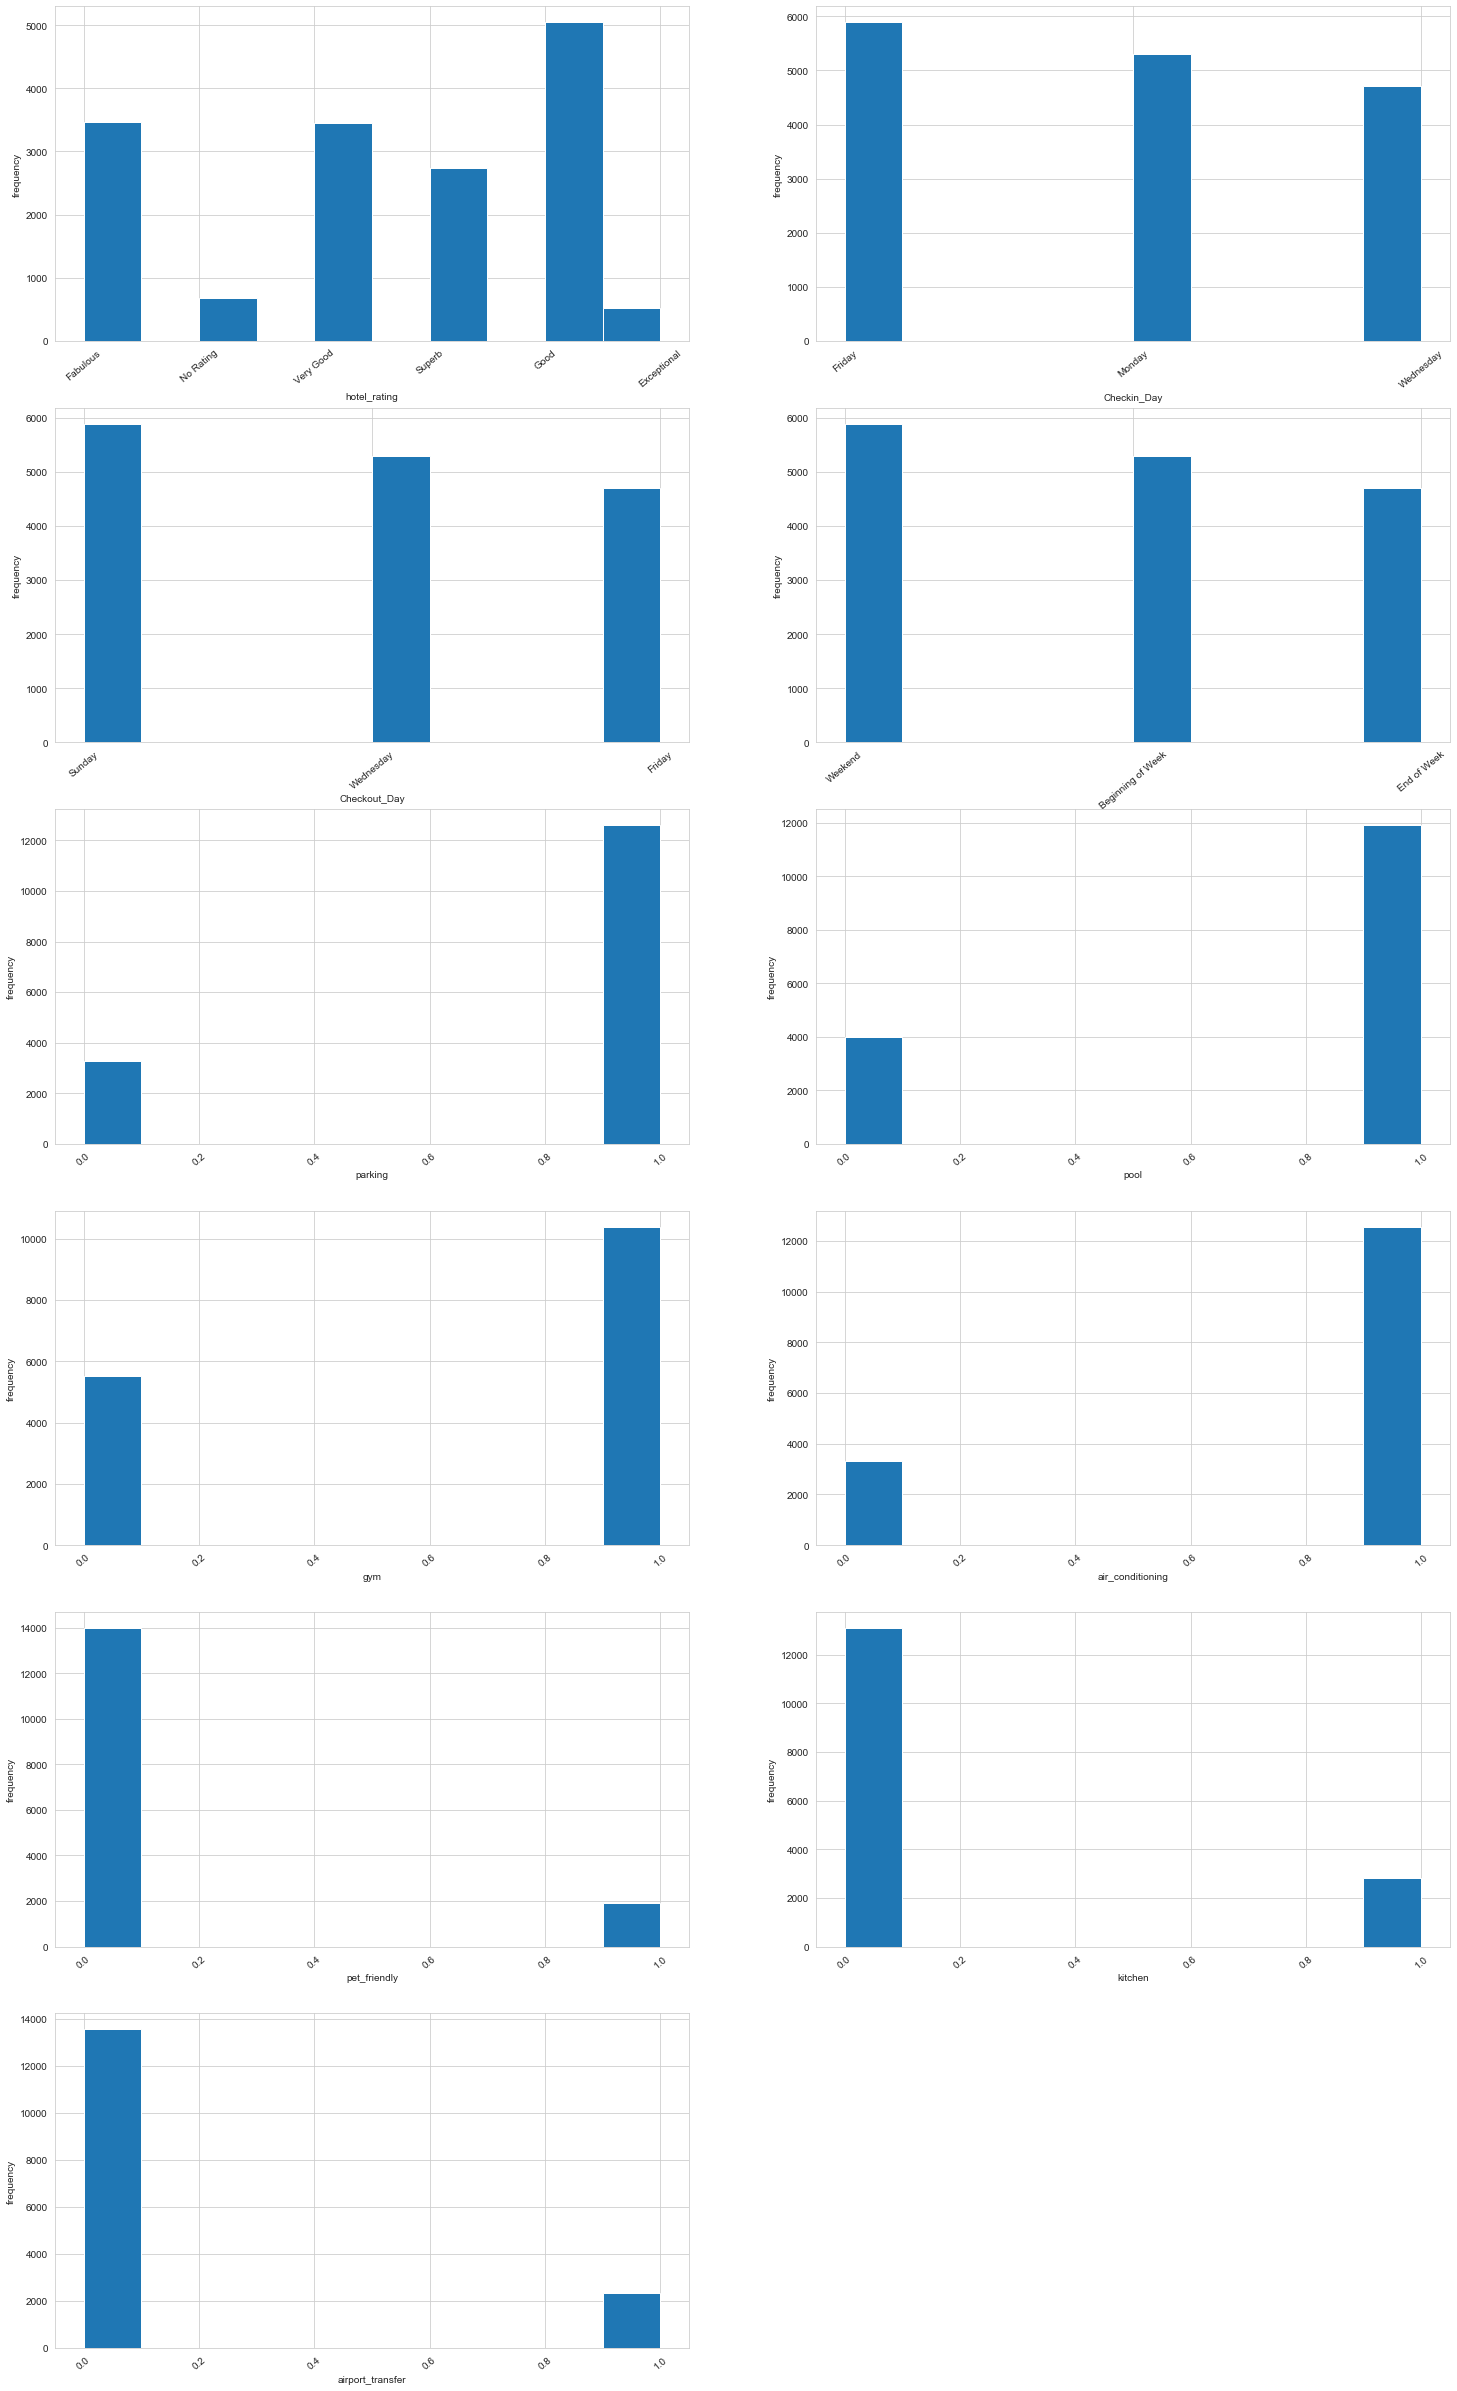

In [13]:
fig = plt.figure(figsize = (25, 80))
size = 15

for i, column in enumerate(categorical_columns):
    num = len(categorical_columns)
    ax = fig.add_subplot(num,2, i+1)
    ax = selected_df[column].hist(xrot=40, bins=10)
    ax.set_ylabel('frequency')
    ax.set_xlabel(column)

In [14]:
len(selected_df[selected_df['hotel_rating'] == 'No Rating'])

680

## Summary
- 'hotel_rating': the number of hotels that are rated as good is the highest, with 5,000. On the other hand, hotels that are rated as 'Exceptional' is really limited, it's just 500 (about 3%). Most hotels are likely to be rated within Very Good, Fabulous, and Superb. 680 hotels were not rated, the number is about 4%. I need to consider whether the data can be ignored or not.   

- 'Checkin_Day': 　Checkins are frequent on Fridays.
- 'Checkout_Day': Checkouts are frequent on Sundays.
- 'When_in_Week':  It does not go against the common sense of using a hotel for sightseeing or traveling on weekends when work is off.
- 'parking', 'pool', 'gym', and 'air_conditioning': most hotel provide these facility services. The number of hotels that equips the pool is a little bit less than that of hotels that equip the parking, the pool, or the gym.

- 'pet_friendly', 'kitchen', and 'airport_tranfer': the number of hotels that accept pets, equip the kitchen, or provide the airport transfer services is just around 2,000. It's approximately 12% of the total.


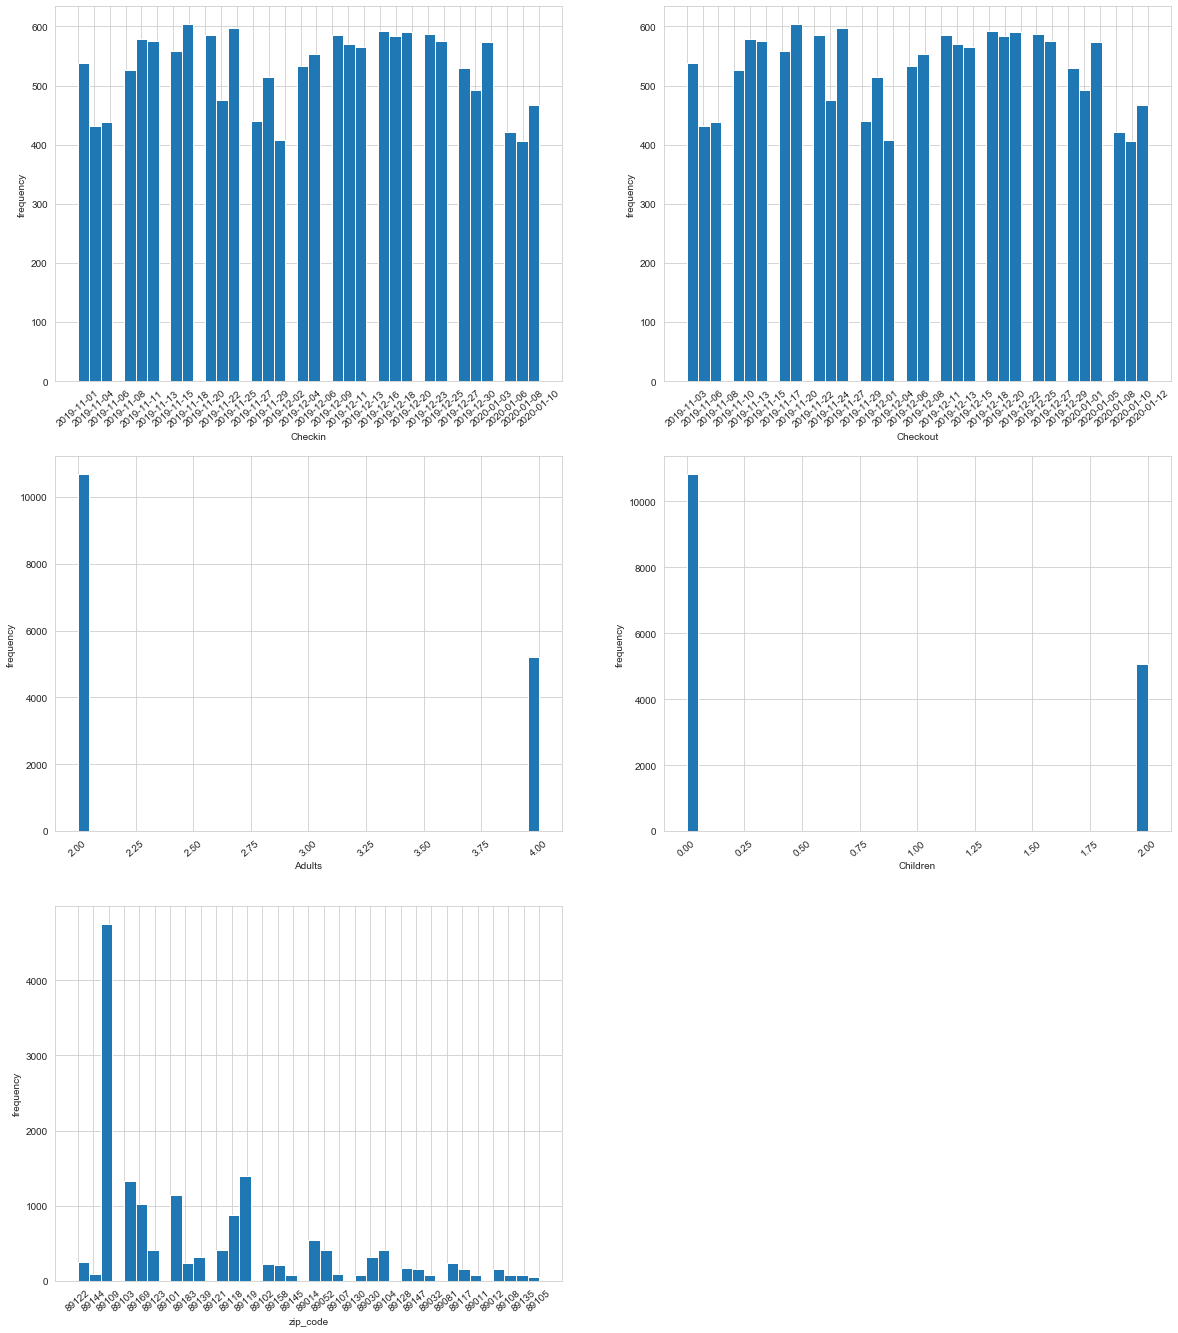

In [15]:
fig = plt.figure(figsize = (20, 40))
size = 15

for i, column in enumerate(discrete_columns):
    num = len(discrete_columns)
    ax = fig.add_subplot(num, 2, i+1)
    ax = selected_df[column].hist(xrot = 40, bins =40)
    ax.set_ylabel('frequency')
    ax.set_xlabel(column)

## Summary 
When it comes to the price, Las Vegas doesn't have a "peak season." As a result, peaks are on weekends and tend to be higher on Friday and Saturday nights, and even higher for special events.

The fourth Thursday of November (2019/11/28) and 11th is a US holiday, so that weekend is a busy time. Naturally, prices tend to be higher during Christmas time.

- 'Checkin', 'Checkout': The number of check-ins was on the rise over the holiday of November 11, and the number of checkins was also high that week. Before and after Thanksgiving on November 28th, the number of checkins was lower than in other weeks.　The number of checkins was high during Christmas, but the number of check-ins decreased toward the end of the year.


- "Adults": At hotels in Las Vegas,　there are only two options for adult's capacity. 2 or 4 persons. The number of hotels that accept only 2 adults is twice than that of hotels that accept 4 adults. 

- 'Children': At hotels in Las Vegas, there are only two options for children's capacity.  2 persons or not acceptable. The number of hotels that don't accept childeren is twice than that of hotels that accept 2 children. 

- 'zip_code': The hotels that are located in 89109 is the most. The area of 89109 is closer to the main spot of Las Vegas. 

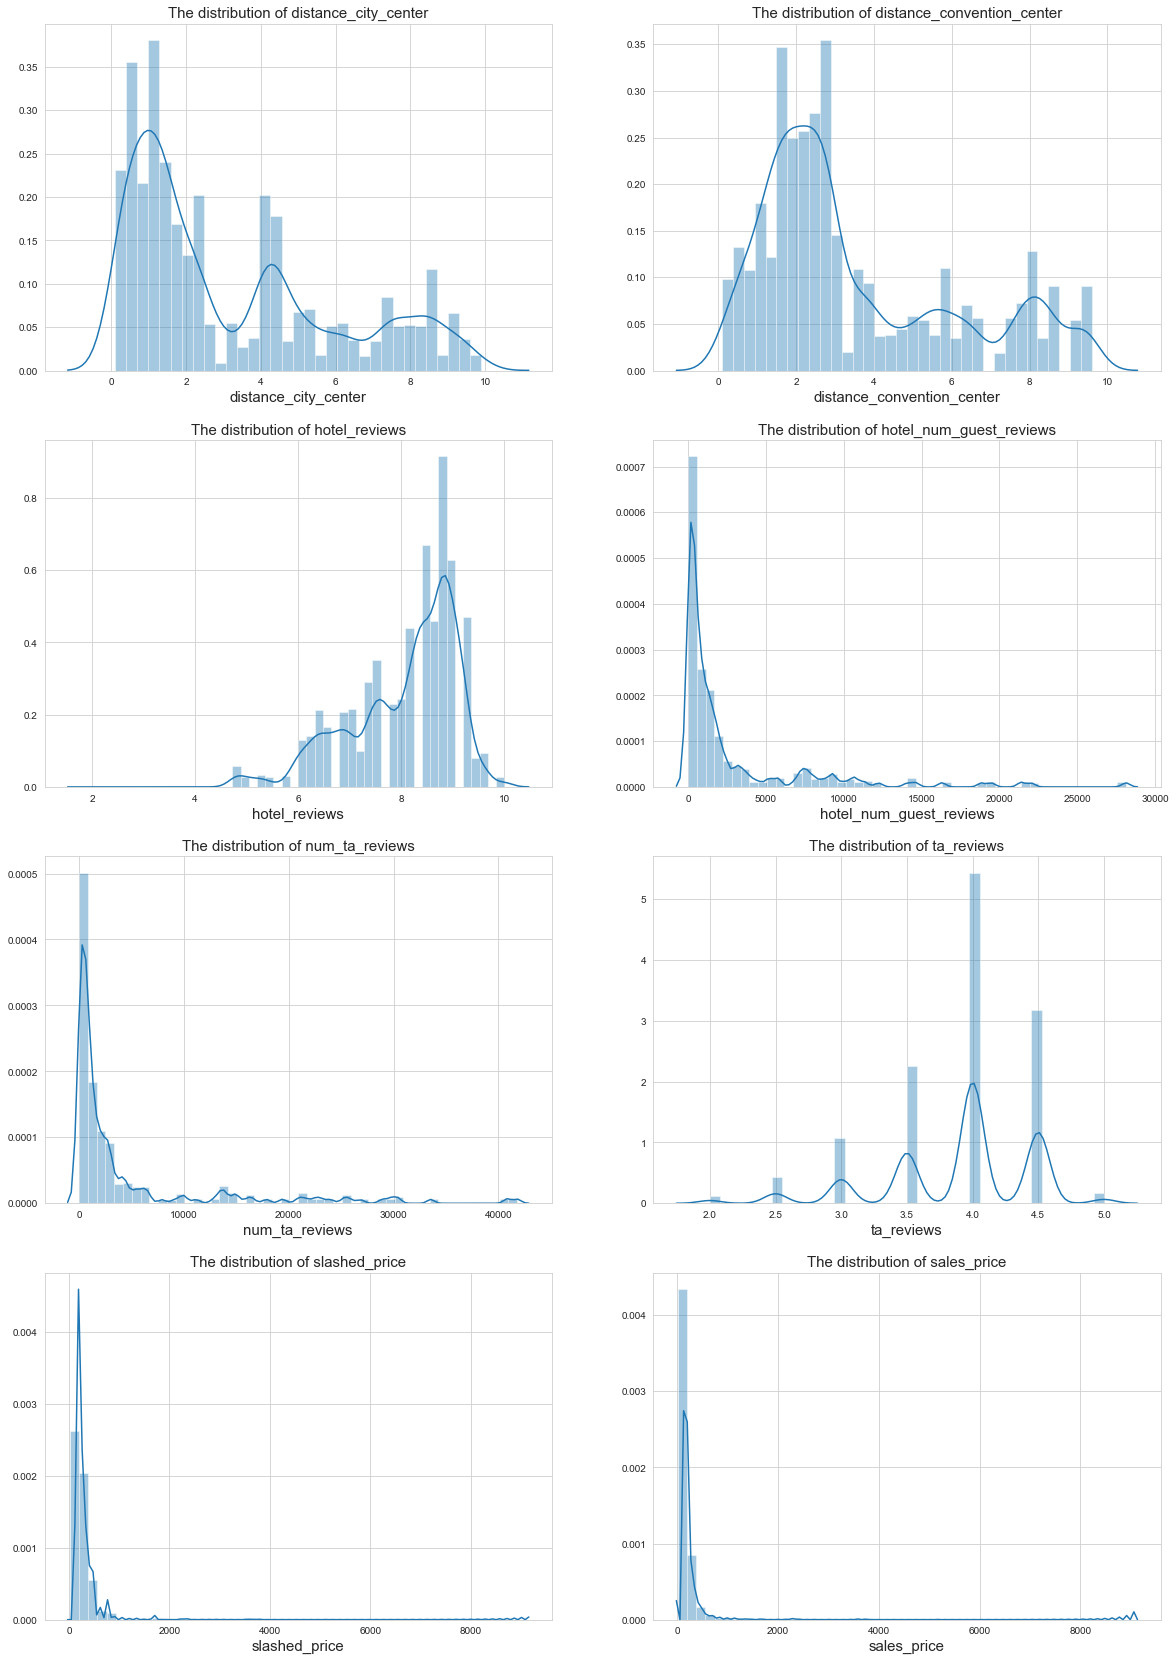

In [16]:
fig = plt.figure(figsize = (20, 60))
size = 15

for i, column in enumerate(continuous_columns):
    num = len(continuous_columns)
    plt.subplot(num, 2, i+1)
    sns.distplot(selected_df[column], kde = True)
    plt.xlabel(f'{column}', size = size)
    plt.title(f'The distribution of {column}', size = size)
    

## Summary

Overall, the distribution looks normal, but there are outliers on review counts and price.
Moreover, the distribution of the number of reviews and price is skewed to the right.

- 'distance_city_center': Many hotels are located within 2 miles of the city center.
- 'distance_convention_center': Many hotels are located within 3 miles of the convention center.
- 'hotel_reviews': the hotels that are rated as within 8 -9 are dominant.
- 'ta_reviews': the hotels rated as 4.0 or 4.5 are dominant, ant the number of hotels that are rated as 2.0 or 5.0 is limited. 
- 'hotel_num_guest_reviews', 'num_ta_reviews', 'slashed_price', 'sales_price':  I need to filter out outliers.

### Filter outliers



In [17]:
import numpy as np

Q1 = np.percentile(selected_df['hotel_num_guest_reviews'], 25)
Q3 = np.percentile(selected_df['hotel_num_guest_reviews'], 75)
#IQR(interquartile range)
IQR = Q3 - Q1

lower_cap = Q1 - 1.5 * IQR
upper_cap = Q3 + 1.5 * IQR

#df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

filtered_df = selected_df[(selected_df['hotel_num_guest_reviews'] < upper_cap) & (selected_df['hotel_num_guest_reviews'] > lower_cap)]


In [18]:
def filter_IQR(df, column):
    Q1, Q3 = np.percentile(df[column], [25, 75])
    #IQR(interquartile range)
    IQR = Q3 - Q1
    
    upper_cap = Q3 + 1.5 * IQR
    lower_cap = Q1 - 1.5 * IQR
    
    return upper_cap, lower_cap

In [19]:
def distplot_filter(df, column, size):
    filter_IQR(df, column)
    filterd_df = df[(df[column] < upper_cap) & (df[column] > lower_cap)]
    sns.distplot(filtered_df[column], kde = True)
    plt.xlabel(f'{column}', size = size)
    plt.title(f'The distribution of {column}', size = size)

In [20]:
continuous_columns

['distance_city_center',
 'distance_convention_center',
 'hotel_reviews',
 'hotel_num_guest_reviews',
 'num_ta_reviews',
 'ta_reviews',
 'slashed_price',
 'sales_price']

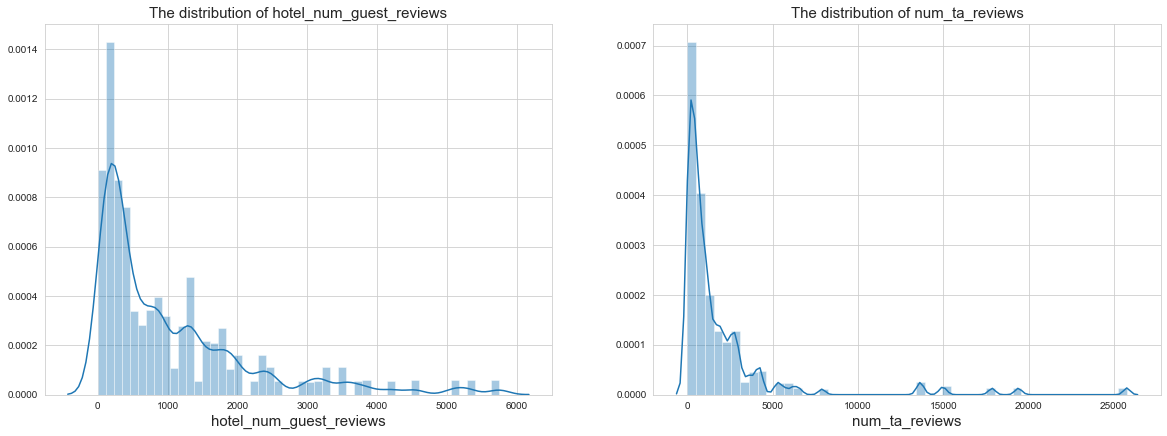

In [21]:
fig = plt.figure(figsize = (20, 15))
size = 15

plt.subplot(2,2,1)
distplot_filter(selected_df, 'hotel_num_guest_reviews', size)

plt.subplot(2,2,2)
distplot_filter(selected_df, 'num_ta_reviews', size)

The distribution of two attributes related to the number of reviews is still skewed to the right. 
To eliminate the skewness, I transform values into logarithmic values.

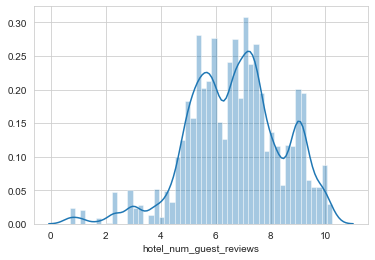

In [22]:
sns.distplot(np.log(selected_df['hotel_num_guest_reviews']))

In [23]:
def distplot_log(df, column, size):
    sns.distplot(np.log(df[column]))
    plt.xlabel(f'{column}', size = size)
    plt.title(f'The log distibution of {column}', size = size)

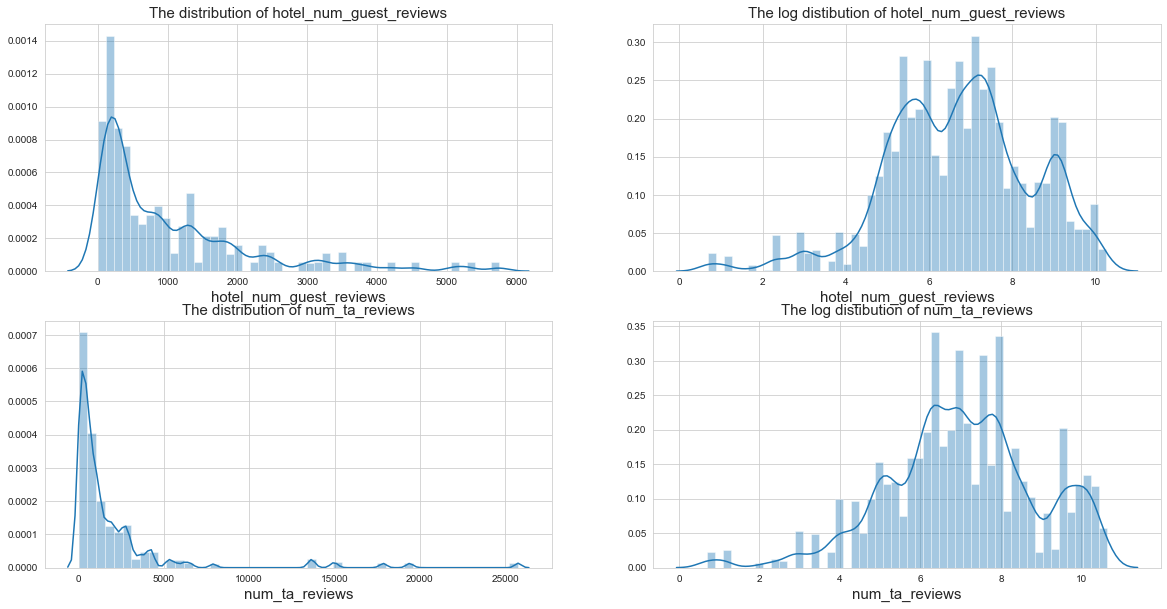

In [24]:
fig = plt.figure(figsize = (20, 10))
size = 15


plt.subplot(2,2,1)
distplot_filter(selected_df, 'hotel_num_guest_reviews', size)

plt.subplot(2,2,2)
distplot_log(selected_df, 'hotel_num_guest_reviews', size)

plt.subplot(2,2,3)
distplot_filter(selected_df, 'num_ta_reviews', size)

plt.subplot(2,2,4)
distplot_log(selected_df, 'num_ta_reviews', size)

The skewness in the distribution of two attributes related to the number of reviews was lessened by taking the logarithmic values.
Hence, I need to create new features having logarithmic values for the two attributes.
This process will be conducted in the part of feature engineering.

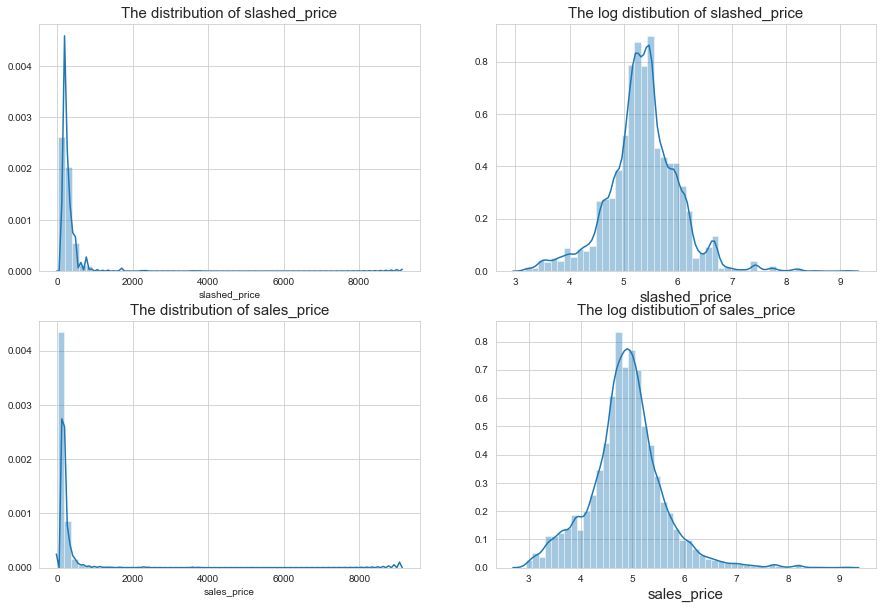

In [25]:
#'slashed_price', 'sales_price'
fig = plt.figure(figsize = (15, 10))
size =15

plt.subplot(2,2,1)
sns.distplot(selected_df['slashed_price'], kde = True)
plt.title('The distribution of slashed_price', size = size )

plt.subplot(2,2,2)
distplot_log(selected_df, 'slashed_price', size= size)

plt.subplot(2,2,3)
sns.distplot(selected_df['sales_price'], kde = True)
plt.title('The distribution of sales_price', size = size)

plt.subplot(2,2,4)
distplot_log(selected_df, 'sales_price', size =size)

In [26]:
#filter_IQR(selected_df, 'sales_price')

## Summary
The distribution of price is quite skewed to the right, but the log distribution looks normal. Hence, I need to create new features transformed into log values.

# Feature Engineering 1st

- create log transformed features
  - hotel_num_guest_reviews
  - num_ta_reviews
  - slashed_price
  - sales_price


In [27]:
transformed_df = selected_df.copy() 
transformed_df['log_hotel_num_guest_reviews'] = np.log(transformed_df['hotel_num_guest_reviews'])
transformed_df['log_num_ta_reviews'] = np.log(transformed_df['num_ta_reviews'])
transformed_df['log_slashed_price'] = np.log(transformed_df['slashed_price'])
transformed_df['log_sales_price'] = np.log(transformed_df['sales_price'])
transformed_df.head()

,Checkin,Checkout,Adults,Children,distance_city_center,distance_convention_center,zip_code,hotel_rating,hotel_reviews,hotel_num_guest_reviews,num_ta_reviews,ta_reviews,slashed_price,sales_price,Checkin_Day,Checkout_Day,When_in_Week,parking,pool,gym,air_conditioning,pet_friendly,kitchen,airport_transfer,log_hotel_num_guest_reviews,log_num_ta_reviews,log_slashed_price,log_sales_price
0,2019-11-01,2019-11-03,2.0,2.0,6.2,5.3,89122,Fabulous,8.6,2339.0,2114.0,4.0,115.0,86.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,7.757479,7.656337,4.744932,4.454347
1,2019-11-01,2019-11-03,2.0,2.0,7.6,8.1,89144,No Rating,8.8,312.0,2316.0,4.0,349.0,199.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,5.743003,7.747597,5.855072,5.293305
2,2019-11-01,2019-11-03,2.0,2.0,0.6,1.2,89109,Very Good,8.2,18827.0,16513.0,4.0,262.0,184.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,9.843047,9.711903,5.568345,5.214936
4,2019-11-01,2019-11-03,2.0,2.0,6.4,5.5,89122,Very Good,8.4,2588.0,871.0,4.0,99.0,74.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,7.858641,6.769642,4.595120,4.304065
5,2019-11-01,2019-11-03,2.0,2.0,1.9,3.4,89103,Very Good,8.4,3870.0,6521.0,4.0,260.0,156.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,8.261010,8.782783,5.560682,5.049856


In [28]:
print('categorical_columns: ',categorical_columns)
print('\n')
print('continuous_columns: ', continuous_columns)
print('\n')
print('discrete_columns', discrete_columns)

categorical_columns:  ['hotel_rating', 'Checkin_Day', 'Checkout_Day', 'When_in_Week', 'parking', 'pool', 'gym', 'air_conditioning', 'pet_friendly', 'kitchen', 'airport_transfer']


continuous_columns:  ['distance_city_center', 'distance_convention_center', 'hotel_reviews', 'hotel_num_guest_reviews', 'num_ta_reviews', 'ta_reviews', 'slashed_price', 'sales_price']


discrete_columns ['Checkin', 'Checkout', 'Adults', 'Children', 'zip_code']


## Relationship

ダミーにしてから処理する方が良いかも？
カテゴリ 、ディスクリートデータ
sales_price vs. continuous ('distance_city_center', 'distance_convention_center', 'hotel_reviews', 'hotel_num_guest_reviews', 'num_ta_reviews', 'ta_reviews', 'log_sales_price')
sales_price vs. categorical ()
sales_price vs. discrete


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0b43404d0>,
      dtype=object)

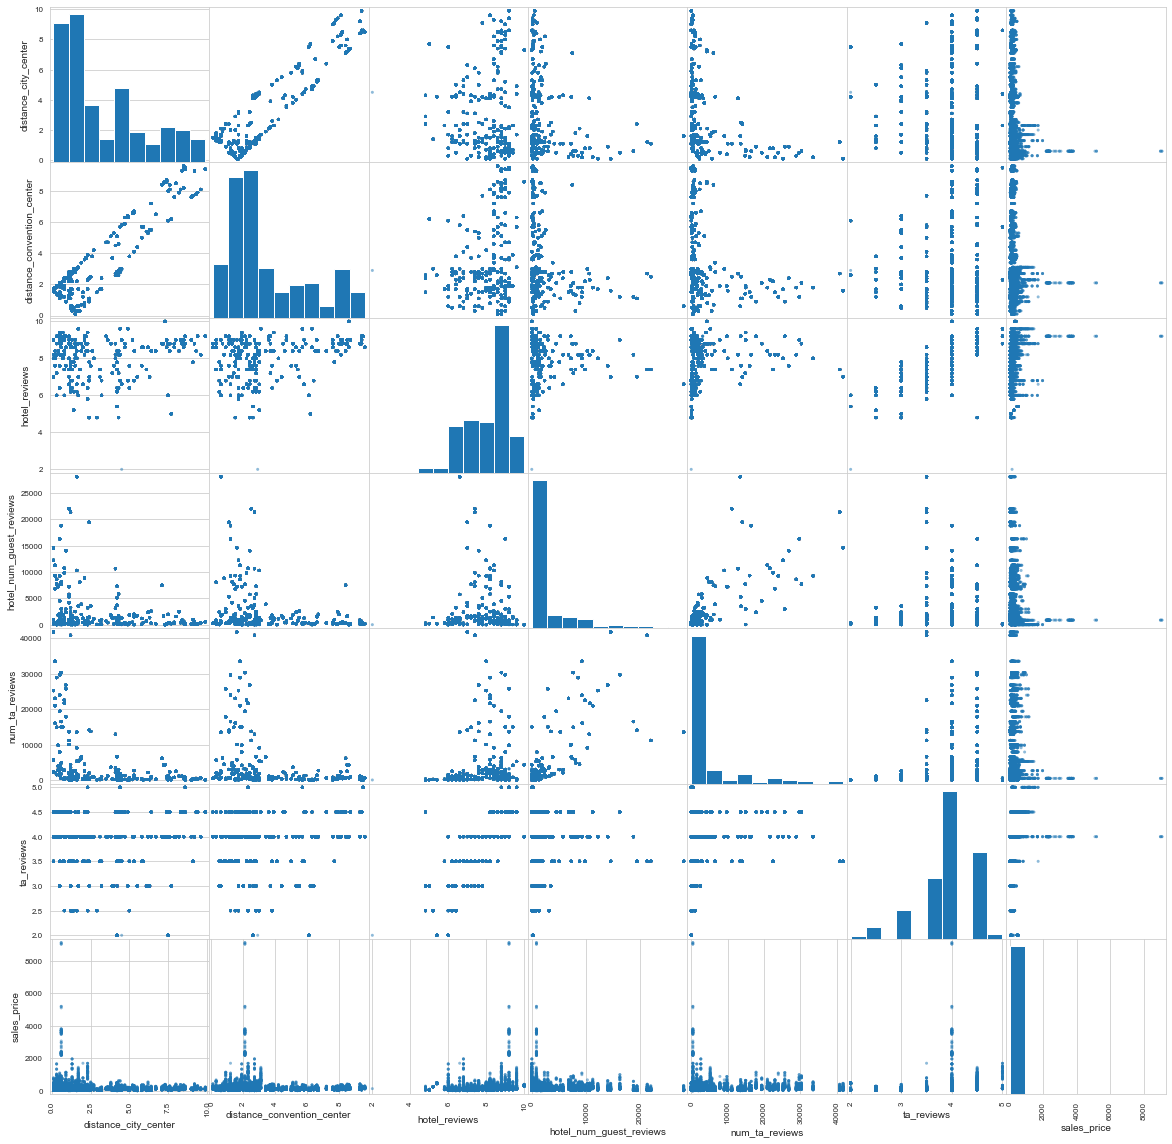

In [29]:
from pandas.plotting import scatter_matrix

#sales_price vs. original continuous variables
scatter_matrix(transformed_df[['distance_city_center', 'distance_convention_center', 'hotel_reviews', 'hotel_num_guest_reviews', 'num_ta_reviews', 'ta_reviews', 'sales_price']],
              figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0b78fb610>,
      dtype=object)

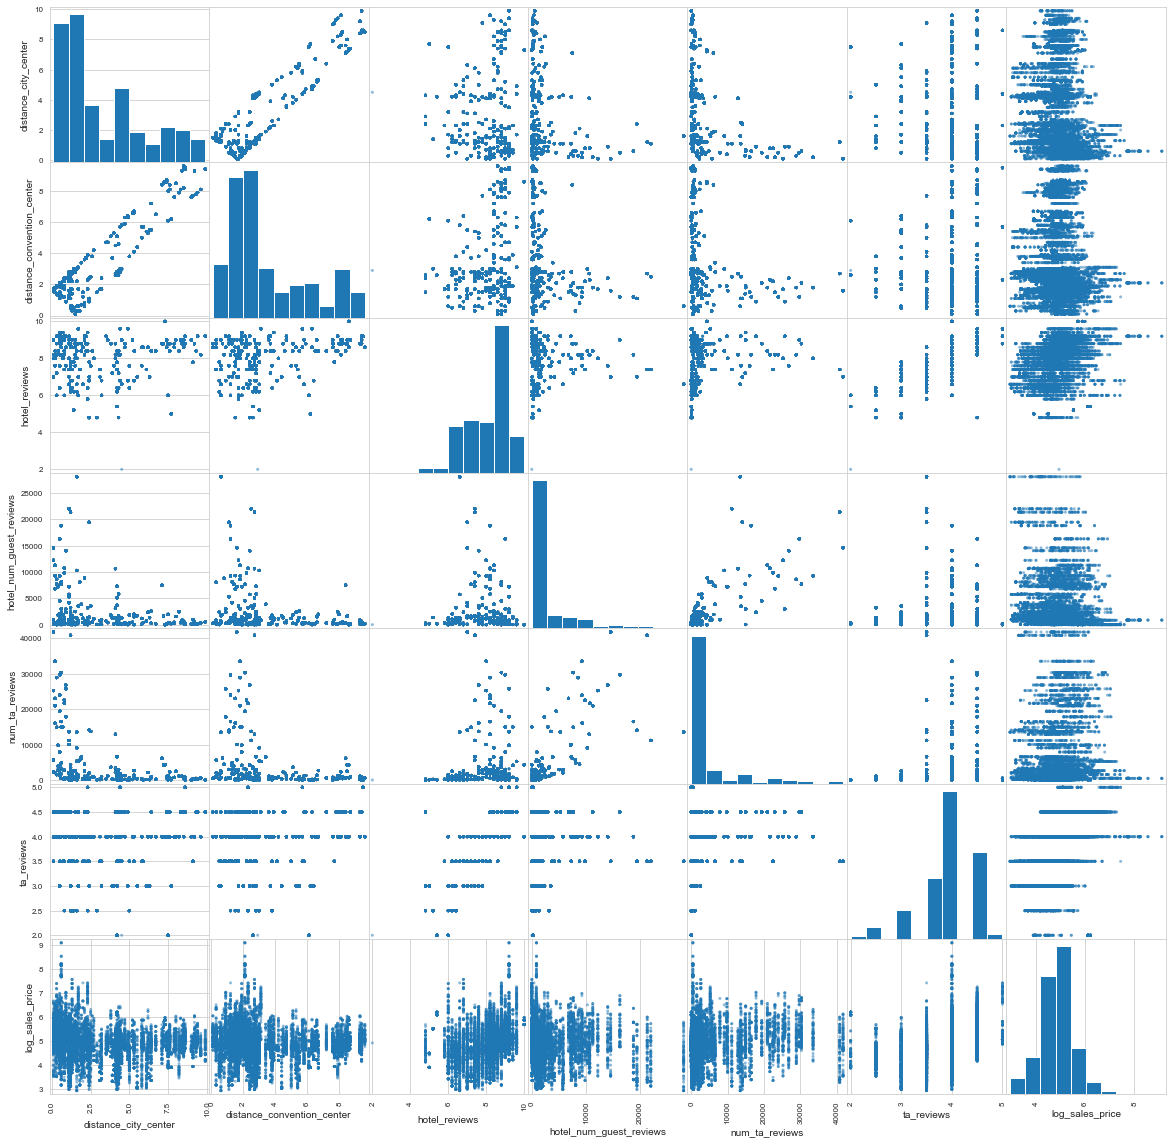

In [30]:
#log_sales_price vs. original continuous variables
scatter_matrix(transformed_df[['distance_city_center', 'distance_convention_center', 'hotel_reviews', 'hotel_num_guest_reviews', 'num_ta_reviews', 'ta_reviews', 'log_sales_price']],
              figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0a0e18910>,
      dtype=object)

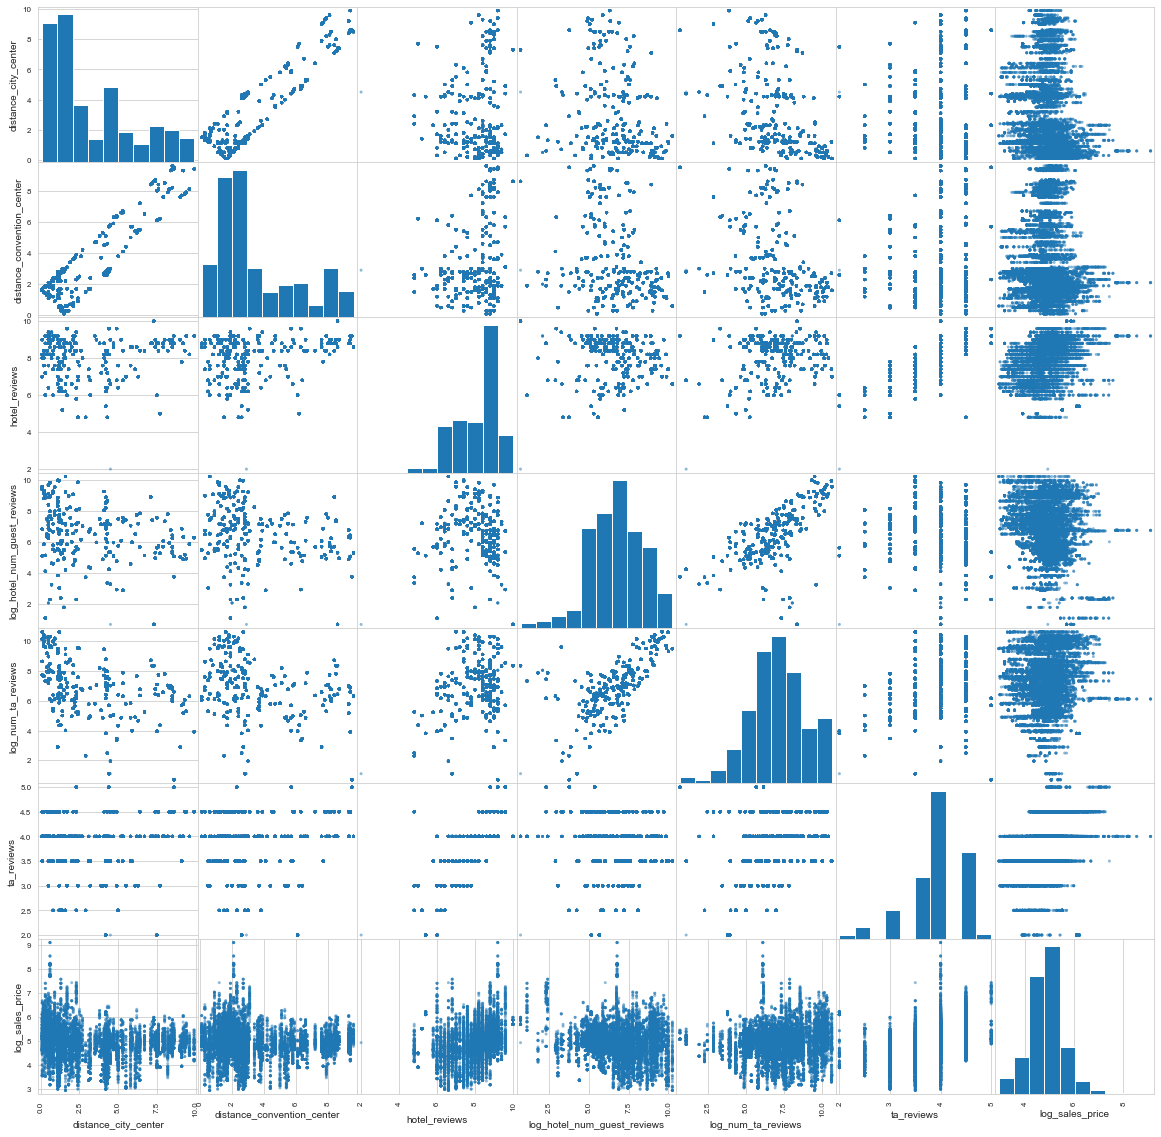

In [31]:
#log_sales_price vs. original continuous variables containg log_hotel_num_guest_reviews & log_num_ta_reviews

scatter_matrix(transformed_df[['distance_city_center', 'distance_convention_center', 'hotel_reviews', 'log_hotel_num_guest_reviews', 'log_num_ta_reviews', 'ta_reviews', 'log_sales_price']],
              figsize=(20,20))

In [32]:
df['name'].value_counts()

Waldorf Astoria Las Vegas             122
ARIA Resort & Casino                  120
Bellagio                              114
Luxor Hotel and Casino                 95
JW Marriott Las Vegas Resort & Spa     95
                                     ... 
Jet Luxury at Palms Place              26
Hostel Cat                             23
American Inn Motel                     20
Raintree At Polo Towers, Las Vegas      4
Walden Motel                            1
Name: name, Length: 206, dtype: int64

In [33]:
transformed_df.columns

Index(['Checkin', 'Checkout', 'Adults', 'Children', 'distance_city_center',
       'distance_convention_center', 'zip_code', 'hotel_rating',
       'hotel_reviews', 'hotel_num_guest_reviews', 'num_ta_reviews',
       'ta_reviews', 'slashed_price', 'sales_price', 'Checkin_Day',
       'Checkout_Day', 'When_in_Week', 'parking', 'pool', 'gym',
       'air_conditioning', 'pet_friendly', 'kitchen', 'airport_transfer',
       'log_hotel_num_guest_reviews', 'log_num_ta_reviews',
       'log_slashed_price', 'log_sales_price'],
      dtype='object')

In [34]:
avg_price_per_hotel = df.groupby('name')['sales_price'].mean().sort_values(ascending = False)
#top 10
avg_price_per_hotel[:10]

name
Waldorf Astoria Las Vegas           2100.500000
The SKYLOFTS at MGM Grand           1153.783333
Palms Place Penthouses               852.750000
Four Seasons Hotel Las Vegas         695.963855
Jockey Club Suite                    660.704918
City Center Motel                    465.666667
Encore at Wynn Las Vegas             386.011494
Wynn Las Vegas                       381.540230
Nobu Hotel at Caesars Palace         329.635294
Grandview Hotel Suites Las Vegas     327.611111
Name: sales_price, dtype: float64

In [35]:
avg_price_per_zipcode = df.groupby('zip_code')['sales_price'].mean().sort_values(ascending = False)
#top 10
avg_price_per_zipcode[:10]

zip_code
89158    1302.459716
89183     206.171674
89109     203.742791
89144     186.726316
89135     184.688312
89103     176.571213
89119     170.596291
89118     167.480136
89012     166.090323
89105     164.214286
Name: sales_price, dtype: float64

Text(0.5, 1.0, 'Average Hotel Price per Night in Las Vegas')

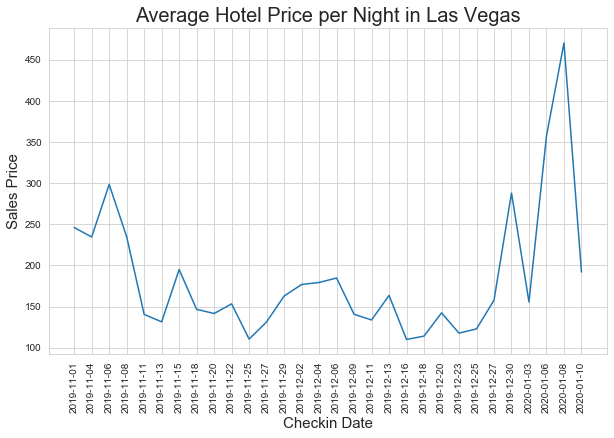

In [36]:
avg_price_per_checkindate = df.groupby('Checkin')['sales_price'].mean()
avg_price_per_checkindate;

plt.figure(figsize = (10, 6))
sns.lineplot(x = avg_price_per_checkindate.index, y = avg_price_per_checkindate)
plt.xticks(avg_price_per_checkindate.index, rotation = 'vertical', size = 10)
plt.xlabel('Checkin Date', fontsize = 15)
plt.ylabel('Sales Price', size = 15)
plt.title('Average Hotel Price per Night in Las Vegas', size = 20)

Text(0.5, 1.0, 'Avarage Hotel Price According to Rating')

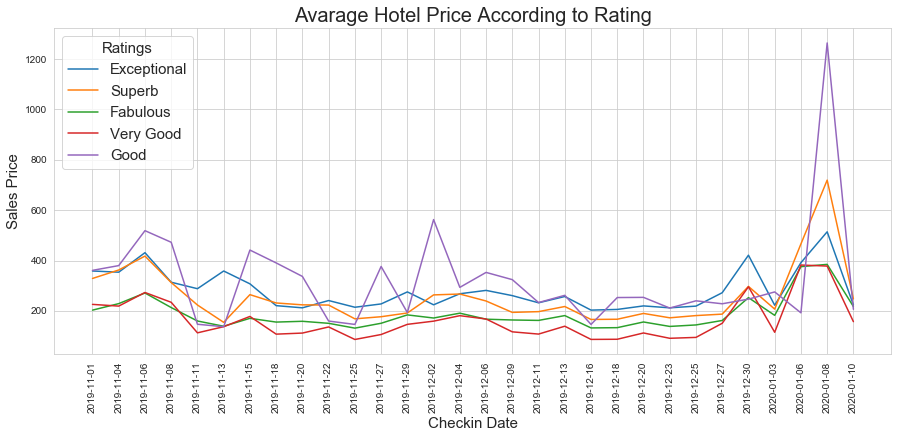

In [37]:
#df['hotel_rating'].value_counts()
class_exceptional = df[df['hotel_rating'] == 'Exceptional']
class_superb = df[df['hotel_rating'] == 'Superb']
class_fabulous = df[df['hotel_rating'] == 'Fabulous']
class_verygood = df[df['hotel_rating'] == 'Very Good']
class_good = df[df['hotel_rating'] == 'Good']
class_norating = df[df['hotel_rating'] == 'No Rating']

avg_price_class_exceptional = class_exceptional.groupby('Checkin')['sales_price'].mean()
avg_price_class_superb = class_superb.groupby('Checkin')['sales_price'].mean()
avg_price_class_fabulous = class_fabulous.groupby('Checkin')['sales_price'].mean()
avg_price_class_verygood = class_verygood.groupby('Checkin')['sales_price'].mean()
avg_price_class_good = class_good.groupby('Checkin')['sales_price'].mean()
avg_price_class_norating = class_norating.groupby('Checkin')['sales_price'].mean()

plt.figure(figsize = (15,6))
sns.lineplot(x = avg_price_class_exceptional.index, y = avg_price_class_exceptional)
sns.lineplot(x = avg_price_class_superb.index, y = avg_price_class_superb)
sns.lineplot(x = avg_price_class_fabulous.index, y = avg_price_class_fabulous)
sns.lineplot(x = avg_price_class_verygood.index, y = avg_price_class_verygood)
sns.lineplot(x = avg_price_class_norating.index, y = avg_price_class_norating)

labels = ['Exceptional', 'Superb', 'Fabulous', 'Very Good', 'Good', 'No Rating'] 
plt.legend(title = 'Ratings', labels = labels, fontsize = 15, title_fontsize = 15)
plt.xticks(avg_price_class_exceptional.index, rotation = 'vertical')
plt.xlabel('Checkin Date', size = 15)
plt.ylabel('Sales Price', size = 15)
plt.title('Avarage Hotel Price According to Rating', size = 20)

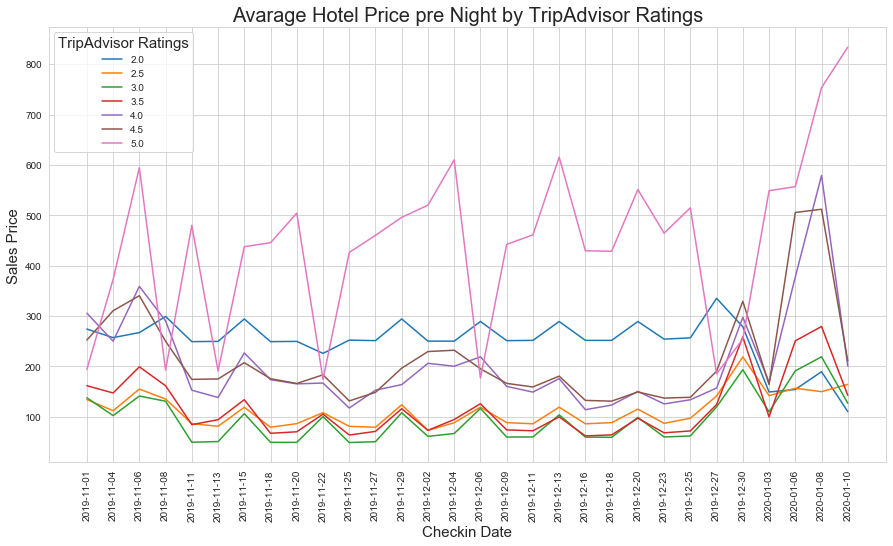

In [38]:
df['ta_reviews'].value_counts()
class_ta_20 = df[df['ta_reviews'] == 2.0]
class_ta_25 = df[df['ta_reviews'] == 2.5]
class_ta_30 = df[df['ta_reviews'] == 3.0]
class_ta_35 = df[df['ta_reviews'] == 3.5]
class_ta_40 = df[df['ta_reviews'] == 4.0]
class_ta_45 = df[df['ta_reviews'] == 4.5]
class_ta_50 = df[df['ta_reviews'] == 5.0]

avg_price_class_ta_20 = class_ta_20.groupby('Checkin')['sales_price'].mean()
avg_price_class_ta_25 = class_ta_25.groupby('Checkin')['sales_price'].mean()
avg_price_class_ta_30 = class_ta_30.groupby('Checkin')['sales_price'].mean()
avg_price_class_ta_35 = class_ta_35.groupby('Checkin')['sales_price'].mean()
avg_price_class_ta_40 = class_ta_40.groupby('Checkin')['sales_price'].mean()
avg_price_class_ta_45 = class_ta_45.groupby('Checkin')['sales_price'].mean()
avg_price_class_ta_50 = class_ta_50.groupby('Checkin')['sales_price'].mean()

plt.figure(figsize = (15,8))
sns.lineplot(x = avg_price_class_ta_20.index, y = avg_price_class_ta_20)
sns.lineplot(x = avg_price_class_ta_25.index, y = avg_price_class_ta_25)
sns.lineplot(x = avg_price_class_ta_30.index, y = avg_price_class_ta_30)
sns.lineplot(x = avg_price_class_ta_35.index, y = avg_price_class_ta_35)
sns.lineplot(x = avg_price_class_ta_40.index, y = avg_price_class_ta_40)
sns.lineplot(x = avg_price_class_ta_45.index, y = avg_price_class_ta_45)
sns.lineplot(x = avg_price_class_ta_50.index, y = avg_price_class_ta_50)
plt.xticks(avg_price_class_ta_20.index, rotation = 'vertical')
ratings_list= ['2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0']
plt.xlabel('Checkin Date', size = 15)
plt.ylabel('Sales Price', size = 15)
plt.title('Avarage Hotel Price pre Night by TripAdvisor Ratings', size = 20)
plt.legend(title = 'TripAdvisor Ratings', labels = ratings_list, fontsize = 10, title_fontsize = 15)

Text(0.5, 1.0, 'Avarage Hotel Price pre Night by Capacity')

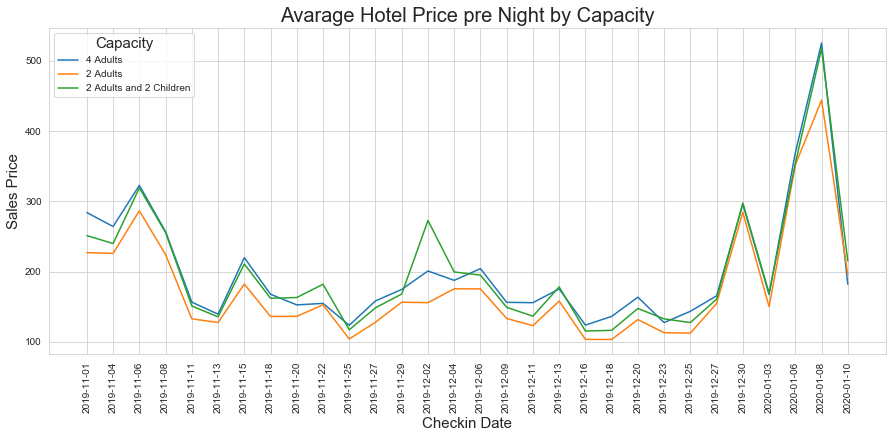

In [39]:
df.head(1)
df['Adults'].value_counts()
class_a4 = df[df['Adults'] == 4.0]
class_a2 = df[df['Adults'] == 2.0]
# The hotels accept 4 adults and 2 childern don't exsit.
#class_a4_c2 = df[(df['Adults'] == 4.0) & (df['Children'] == 2.0)]
class_a2_c2 = df[(df['Adults'] == 2.0) & (df['Children'] == 2.0)]

avg_price_class_a4 = class_a4.groupby('Checkin')['sales_price'].mean()
avg_price_class_a2 = class_a2.groupby('Checkin')['sales_price'].mean()
avg_price_class_a2_c2 = class_a2_c2.groupby('Checkin')['sales_price'].mean()

plt.figure(figsize =(15,6))
sns.lineplot(x = avg_price_class_a4.index, y = avg_price_class_a4)
sns.lineplot(x = avg_price_class_a4.index, y = avg_price_class_a2)
sns.lineplot(x = avg_price_class_a4.index, y = avg_price_class_a2_c2)
plt.xticks(avg_price_class_a4.index, rotation = 'vertical')
labels = ['4 Adults', '2 Adults', '2 Adults and 2 Children']
plt.legend(title = 'Capacity', labels = labels, fontsize = 10, title_fontsize = 15)
plt.xlabel('Checkin Date', size = 15)
plt.ylabel('Sales Price', size = 15)
plt.title('Avarage Hotel Price pre Night by Capacity', size = 20)

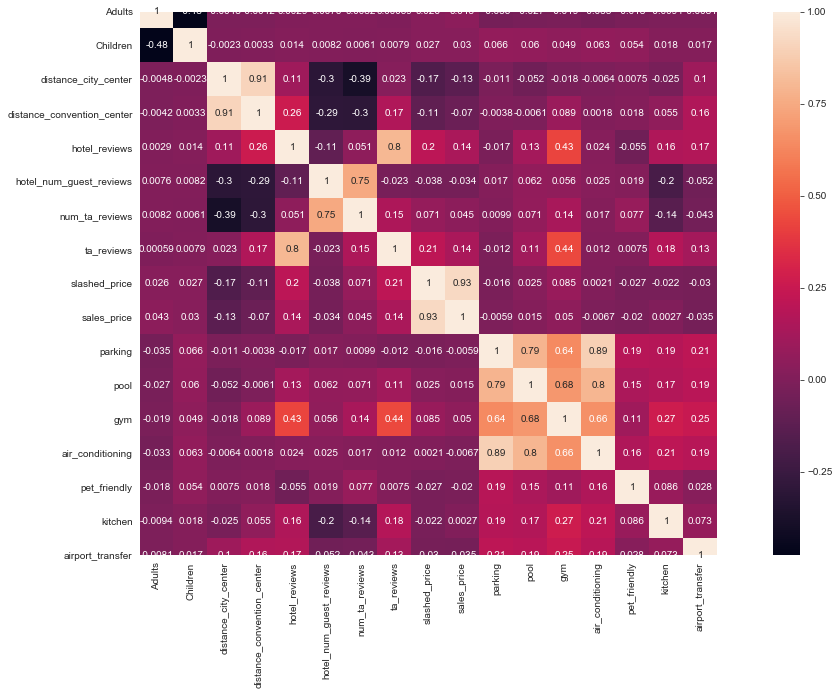

In [40]:
fig = plt.figure(figsize = (20, 10))
corr = selected_df.corr()
sns.heatmap(corr, square=True, annot=True)

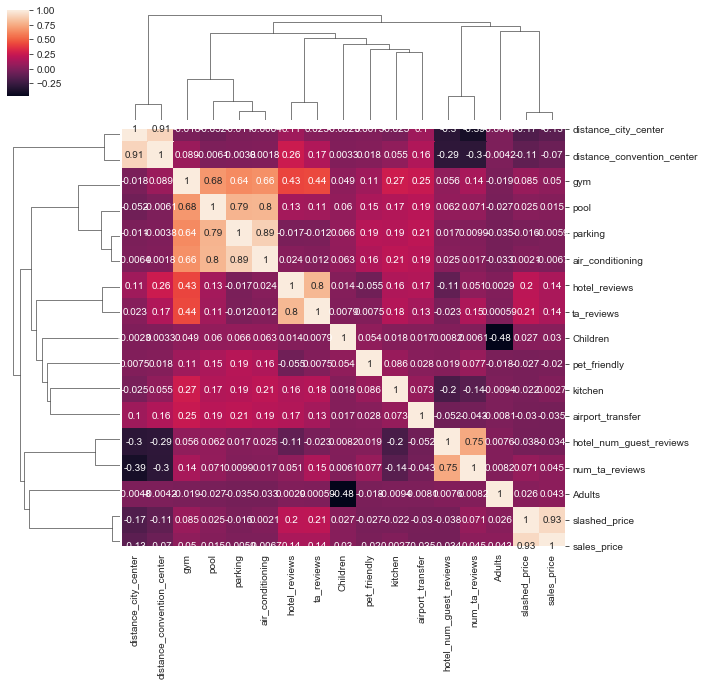

In [41]:
sns.clustermap(corr, square=True, annot=True)

In [42]:
transformed_df.head()

,Checkin,Checkout,Adults,Children,distance_city_center,distance_convention_center,zip_code,hotel_rating,hotel_reviews,hotel_num_guest_reviews,num_ta_reviews,ta_reviews,slashed_price,sales_price,Checkin_Day,Checkout_Day,When_in_Week,parking,pool,gym,air_conditioning,pet_friendly,kitchen,airport_transfer,log_hotel_num_guest_reviews,log_num_ta_reviews,log_slashed_price,log_sales_price
0,2019-11-01,2019-11-03,2.0,2.0,6.2,5.3,89122,Fabulous,8.6,2339.0,2114.0,4.0,115.0,86.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,7.757479,7.656337,4.744932,4.454347
1,2019-11-01,2019-11-03,2.0,2.0,7.6,8.1,89144,No Rating,8.8,312.0,2316.0,4.0,349.0,199.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,5.743003,7.747597,5.855072,5.293305
2,2019-11-01,2019-11-03,2.0,2.0,0.6,1.2,89109,Very Good,8.2,18827.0,16513.0,4.0,262.0,184.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,9.843047,9.711903,5.568345,5.214936
4,2019-11-01,2019-11-03,2.0,2.0,6.4,5.5,89122,Very Good,8.4,2588.0,871.0,4.0,99.0,74.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,7.858641,6.769642,4.595120,4.304065
5,2019-11-01,2019-11-03,2.0,2.0,1.9,3.4,89103,Very Good,8.4,3870.0,6521.0,4.0,260.0,156.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,8.261010,8.782783,5.560682,5.049856


In [43]:
'''
conditionlist = [(transformed_df['hotel_rating'] == 'Exceptional'),
                            (transformed_df['hotel_rating'] == 'Superb'),
                            (transformed_df['hotel_rating'] == 'Fabulous'),
                            (transformed_df['hotel_rating'] == 'Very Good'),
                            (transformed_df['hotel_rating'] == 'Good'),
                            (transformed_df['hotel_rating'] == 'No Rating')]
choicelist = [5,4,3,2,1,0]
transformed_df['hotel_rating_FE'] = np.select(conditionlist, choicelist, default='Not Specified')
'''

#FE変数よりダミー変数
map_dictionary = {'Exceptional' :5 , 'Superb': 4, 'Fabulous' : 3, 'Very Good' : 2, 'Good' : 1, 'No Rating' : 0}
transformed_df['hotel_rating_FE'] = transformed_df['hotel_rating'].map(map_dictionary)
transformed_df.head()


,Checkin,Checkout,Adults,Children,distance_city_center,distance_convention_center,zip_code,hotel_rating,hotel_reviews,hotel_num_guest_reviews,num_ta_reviews,ta_reviews,slashed_price,sales_price,Checkin_Day,Checkout_Day,When_in_Week,parking,pool,gym,air_conditioning,pet_friendly,kitchen,airport_transfer,log_hotel_num_guest_reviews,log_num_ta_reviews,log_slashed_price,log_sales_price,hotel_rating_FE
0,2019-11-01,2019-11-03,2.0,2.0,6.2,5.3,89122,Fabulous,8.6,2339.0,2114.0,4.0,115.0,86.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,7.757479,7.656337,4.744932,4.454347,3
1,2019-11-01,2019-11-03,2.0,2.0,7.6,8.1,89144,No Rating,8.8,312.0,2316.0,4.0,349.0,199.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,5.743003,7.747597,5.855072,5.293305,0
2,2019-11-01,2019-11-03,2.0,2.0,0.6,1.2,89109,Very Good,8.2,18827.0,16513.0,4.0,262.0,184.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,9.843047,9.711903,5.568345,5.214936,2
4,2019-11-01,2019-11-03,2.0,2.0,6.4,5.5,89122,Very Good,8.4,2588.0,871.0,4.0,99.0,74.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,7.858641,6.769642,4.595120,4.304065,2
5,2019-11-01,2019-11-03,2.0,2.0,1.9,3.4,89103,Very Good,8.4,3870.0,6521.0,4.0,260.0,156.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,8.261010,8.782783,5.560682,5.049856,2


In [44]:
#FE変数よりダミー変数
# Monday = 1, Wednesday = 2, Friday = 3
transformed_df['Checkin_Day'].value_counts()
map_dictionary = {'Monday': 1, 'Wednesday': 2, 'Friday': 3}
transformed_df['Checkin_Day_FE'] = transformed_df['Checkin_Day'].map(map_dictionary)
transformed_df.head()

,Checkin,Checkout,Adults,Children,distance_city_center,distance_convention_center,zip_code,hotel_rating,hotel_reviews,hotel_num_guest_reviews,num_ta_reviews,ta_reviews,slashed_price,sales_price,Checkin_Day,Checkout_Day,When_in_Week,parking,pool,gym,air_conditioning,pet_friendly,kitchen,airport_transfer,log_hotel_num_guest_reviews,log_num_ta_reviews,log_slashed_price,log_sales_price,hotel_rating_FE,Checkin_Day_FE
0,2019-11-01,2019-11-03,2.0,2.0,6.2,5.3,89122,Fabulous,8.6,2339.0,2114.0,4.0,115.0,86.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,7.757479,7.656337,4.744932,4.454347,3,3
1,2019-11-01,2019-11-03,2.0,2.0,7.6,8.1,89144,No Rating,8.8,312.0,2316.0,4.0,349.0,199.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,5.743003,7.747597,5.855072,5.293305,0,3
2,2019-11-01,2019-11-03,2.0,2.0,0.6,1.2,89109,Very Good,8.2,18827.0,16513.0,4.0,262.0,184.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,9.843047,9.711903,5.568345,5.214936,2,3
4,2019-11-01,2019-11-03,2.0,2.0,6.4,5.5,89122,Very Good,8.4,2588.0,871.0,4.0,99.0,74.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,7.858641,6.769642,4.595120,4.304065,2,3
5,2019-11-01,2019-11-03,2.0,2.0,1.9,3.4,89103,Very Good,8.4,3870.0,6521.0,4.0,260.0,156.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,8.261010,8.782783,5.560682,5.049856,2,3


In [45]:
#FE変数よりダミー変数
# Wednesday: 1, Friday: 2, Sunday: 3
transformed_df['Checkout_Day'].value_counts()
map_dictionary = {'Wednesday' : 1, 'Friday' : 2, 'Sunday' : 3}
transformed_df['Checkout_Day_FE'] = transformed_df['Checkout_Day'].map(map_dictionary)
transformed_df.head()

,Checkin,Checkout,Adults,Children,distance_city_center,distance_convention_center,zip_code,hotel_rating,hotel_reviews,hotel_num_guest_reviews,num_ta_reviews,ta_reviews,slashed_price,sales_price,Checkin_Day,Checkout_Day,When_in_Week,parking,pool,gym,air_conditioning,pet_friendly,kitchen,airport_transfer,log_hotel_num_guest_reviews,log_num_ta_reviews,log_slashed_price,log_sales_price,hotel_rating_FE,Checkin_Day_FE,Checkout_Day_FE
0,2019-11-01,2019-11-03,2.0,2.0,6.2,5.3,89122,Fabulous,8.6,2339.0,2114.0,4.0,115.0,86.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,7.757479,7.656337,4.744932,4.454347,3,3,3
1,2019-11-01,2019-11-03,2.0,2.0,7.6,8.1,89144,No Rating,8.8,312.0,2316.0,4.0,349.0,199.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,5.743003,7.747597,5.855072,5.293305,0,3,3
2,2019-11-01,2019-11-03,2.0,2.0,0.6,1.2,89109,Very Good,8.2,18827.0,16513.0,4.0,262.0,184.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,9.843047,9.711903,5.568345,5.214936,2,3,3
4,2019-11-01,2019-11-03,2.0,2.0,6.4,5.5,89122,Very Good,8.4,2588.0,871.0,4.0,99.0,74.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,7.858641,6.769642,4.595120,4.304065,2,3,3
5,2019-11-01,2019-11-03,2.0,2.0,1.9,3.4,89103,Very Good,8.4,3870.0,6521.0,4.0,260.0,156.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,8.261010,8.782783,5.560682,5.049856,2,3,3


In [46]:
#FE変数よりダミー変数
# Beginning of Week: 1, Weekend:2, End of Week: 3 
map_dictionary = {'Beginning of Week' : 1, 'Weekend' : 2, 'End of Week' : 3}

transformed_df['When_in_Week_FE'] = transformed_df['When_in_Week'].map(map_dictionary)
transformed_df.head()

,Checkin,Checkout,Adults,Children,distance_city_center,distance_convention_center,zip_code,hotel_rating,hotel_reviews,hotel_num_guest_reviews,num_ta_reviews,ta_reviews,slashed_price,sales_price,Checkin_Day,Checkout_Day,When_in_Week,parking,pool,gym,air_conditioning,pet_friendly,kitchen,airport_transfer,log_hotel_num_guest_reviews,log_num_ta_reviews,log_slashed_price,log_sales_price,hotel_rating_FE,Checkin_Day_FE,Checkout_Day_FE,When_in_Week_FE
0,2019-11-01,2019-11-03,2.0,2.0,6.2,5.3,89122,Fabulous,8.6,2339.0,2114.0,4.0,115.0,86.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,7.757479,7.656337,4.744932,4.454347,3,3,3,2
1,2019-11-01,2019-11-03,2.0,2.0,7.6,8.1,89144,No Rating,8.8,312.0,2316.0,4.0,349.0,199.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,5.743003,7.747597,5.855072,5.293305,0,3,3,2
2,2019-11-01,2019-11-03,2.0,2.0,0.6,1.2,89109,Very Good,8.2,18827.0,16513.0,4.0,262.0,184.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,9.843047,9.711903,5.568345,5.214936,2,3,3,2
4,2019-11-01,2019-11-03,2.0,2.0,6.4,5.5,89122,Very Good,8.4,2588.0,871.0,4.0,99.0,74.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,7.858641,6.769642,4.595120,4.304065,2,3,3,2
5,2019-11-01,2019-11-03,2.0,2.0,1.9,3.4,89103,Very Good,8.4,3870.0,6521.0,4.0,260.0,156.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,8.261010,8.782783,5.560682,5.049856,2,3,3,2


In [47]:
#int型よりダミー変数
transformed_df['zip_code'] = transformed_df['zip_code'].astype(int)
transformed_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15897 entries, 0 to 19952
Data columns (total 32 columns):
Checkin                        15897 non-null object
Checkout                       15897 non-null object
Adults                         15897 non-null float64
Children                       15897 non-null float64
distance_city_center           15897 non-null float64
distance_convention_center     15897 non-null float64
zip_code                       15897 non-null int64
hotel_rating                   15897 non-null object
hotel_reviews                  15897 non-null float64
hotel_num_guest_reviews        15897 non-null float64
num_ta_reviews                 15897 non-null float64
ta_reviews                     15897 non-null float64
slashed_price                  15897 non-null float64
sales_price                    15897 non-null float64
Checkin_Day                    15897 non-null object
Checkout_Day                   15897 non-null object
When_in_Week                   158

In [48]:
transformed_df.describe()

,Adults,Children,distance_city_center,distance_convention_center,zip_code,hotel_reviews,hotel_num_guest_reviews,num_ta_reviews,ta_reviews,slashed_price,sales_price,parking,pool,gym,air_conditioning,pet_friendly,kitchen,airport_transfer,log_hotel_num_guest_reviews,log_num_ta_reviews,log_slashed_price,log_sales_price,hotel_rating_FE,Checkin_Day_FE,Checkout_Day_FE,When_in_Week_FE
count,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000
mean,2.655092,0.637227,3.185406,3.538775,89108.772473,8.060741,2731.936969,4620.156885,3.896018,267.384978,177.950305,0.792980,0.749009,0.653771,0.790527,0.120400,0.176260,0.148141,6.718064,7.050847,5.355983,4.873337,2.257596,2.037303,2.037303,1.962697
std,0.938666,0.931907,2.759864,2.559087,33.770449,1.037201,4580.319752,8145.596795,0.556147,296.257756,279.104274,0.405183,0.433597,0.475782,0.406946,0.325439,0.381053,0.355251,1.714657,1.860414,0.644601,0.703410,1.273845,0.838226,0.838226,0.792472
min,2.000000,0.000000,0.100000,0.100000,89011.000000,2.000000,2.000000,2.000000,2.000000,24.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,3.178054,2.944439,0.000000,1.000000,1.000000,1.000000
25%,2.000000,0.000000,1.100000,1.700000,89103.000000,7.400000,262.000000,397.000000,3.500000,154.000000,90.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.568345,5.983936,5.036953,4.499810,1.000000,1.000000,1.000000,1.000000
50%,2.000000,0.000000,2.100000,2.700000,89109.000000,8.400000,868.000000,1124.000000,4.000000,213.000000,131.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.766192,7.024649,5.361292,4.875197,2.000000,2.000000,2.000000,2.000000
75%,4.000000,2.000000,4.900000,5.300000,89119.000000,8.800000,2463.000000,3646.000000,4.500000,299.000000,187.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.809135,8.201386,5.700444,5.231109,3.000000,3.000000,3.000000,3.000000
max,4.000000,2.000000,9.900000,9.600000,89183.000000,10.000000,28121.000000,41798.000000,5.000000,9100.000000,9100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.244272,10.640604,9.116030,9.116030,5.000000,3.000000,3.000000,3.000000


# Modelling 1st

Dataset: 
price attributes are trasformed into the log values
categorical attributes are engineered

Pertatition: 70/30

Model: linear regression(stepwise/forward method), polynomial regression, XGBoost, Random Forest, SVM, (decision tree), neural network

In [49]:
#'Checkin', 'Checkout', 
selected_attributes = [ 'Adults', 'Children', 'distance_city_center',
       'distance_convention_center', 'zip_code',
       'hotel_reviews', 'hotel_num_guest_reviews', 'num_ta_reviews',
       'ta_reviews', 'parking', 'pool', 'gym',
       'air_conditioning', 'pet_friendly', 'kitchen', 'airport_transfer',
       'log_hotel_num_guest_reviews', 'log_num_ta_reviews', 'log_sales_price', 'hotel_rating_FE',
       'Checkin_Day_FE', 'Checkout_Day_FE', 'When_in_Week_FE']
model_df = transformed_df[selected_attributes]
model_df.head()

,Adults,Children,distance_city_center,distance_convention_center,zip_code,hotel_reviews,hotel_num_guest_reviews,num_ta_reviews,ta_reviews,parking,pool,gym,air_conditioning,pet_friendly,kitchen,airport_transfer,log_hotel_num_guest_reviews,log_num_ta_reviews,log_sales_price,hotel_rating_FE,Checkin_Day_FE,Checkout_Day_FE,When_in_Week_FE
0,2.0,2.0,6.2,5.3,89122,8.6,2339.0,2114.0,4.0,1,1,1,1,0,0,0,7.757479,7.656337,4.454347,3,3,3,2
1,2.0,2.0,7.6,8.1,89144,8.8,312.0,2316.0,4.0,1,1,1,1,0,0,0,5.743003,7.747597,5.293305,0,3,3,2
2,2.0,2.0,0.6,1.2,89109,8.2,18827.0,16513.0,4.0,1,1,1,1,0,0,0,9.843047,9.711903,5.214936,2,3,3,2
4,2.0,2.0,6.4,5.5,89122,8.4,2588.0,871.0,4.0,1,1,1,1,0,0,0,7.858641,6.769642,4.304065,2,3,3,2
5,2.0,2.0,1.9,3.4,89103,8.4,3870.0,6521.0,4.0,1,1,1,1,0,0,0,8.261010,8.782783,5.049856,2,3,3,2


In [50]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15897 entries, 0 to 19952
Data columns (total 23 columns):
Adults                         15897 non-null float64
Children                       15897 non-null float64
distance_city_center           15897 non-null float64
distance_convention_center     15897 non-null float64
zip_code                       15897 non-null int64
hotel_reviews                  15897 non-null float64
hotel_num_guest_reviews        15897 non-null float64
num_ta_reviews                 15897 non-null float64
ta_reviews                     15897 non-null float64
parking                        15897 non-null int64
pool                           15897 non-null int64
gym                            15897 non-null int64
air_conditioning               15897 non-null int64
pet_friendly                   15897 non-null int64
kitchen                        15897 non-null int64
airport_transfer               15897 non-null int64
log_hotel_num_guest_reviews    15897 non-nu

## XGBoost

In [51]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
#from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
#from sklearn.grid_search import GridSearchCV

In [52]:
#X = model_df.drop(['log_sales_price'], axis = 1).values
X = model_df.drop(['log_sales_price'], axis = 1)
y = model_df['log_sales_price']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [54]:
params = {'eta': [0.01, 0.1, 1.0], 
                  'gamma': [0, 0.1],   
                  'n_estimators': [10, 100], 
                  'max_depth':[2, 4],   
                  'min_child_weigh': [1, 2],
                  'nthread': [2]}

mod = xgb.XGBRegressor()
cv = GridSearchCV(mod, params, cv = 5, scoring = 'r2', n_jobs = 1,verbose = 3)
#price is log values, it's hard to understand the accuracy from RMSE
#cv = GridSearchCV(mod, params, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = 1,verbose = 3)

cv_model = cv.fit(X_train, y_train)

y_train_pred = cv_model.predict(X_train)
y_test_pred = cv_model.predict(X_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] eta=0.01, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2 
[14:08:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  eta=0.01, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2, score=-29.823, total=   0.0s
[CV] eta=0.01, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2 
[14:08:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip thr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  eta=0.01, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2, score=-4.730, total=   0.2s
[CV] eta=0.01, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2 
[14:08:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  eta=0.01, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2, score=-5.263, total=   0.2s
[CV] eta=0.01, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2 
[14:08:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoo

[14:08:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  eta=0.01, gamma=0, max_depth=4, min_child_weigh=1, n_estimators=10, nthread=2, score=-31.765, total=   0.0s
[CV] eta=0.01, gamma=0, max_depth=4, min_child_weigh=1, n_estimators=100, nthread=2 
[14:08:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  eta=0.01, gamma=0, max_depth=4, min_child_weigh=1, n_estimators=1

[CV]  eta=0.01, gamma=0, max_depth=4, min_child_weigh=2, n_estimators=100, nthread=2, score=-4.624, total=   0.4s
[CV] eta=0.01, gamma=0, max_depth=4, min_child_weigh=2, n_estimators=100, nthread=2 
[14:08:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  eta=0.01, gamma=0, max_depth=4, min_child_weigh=2, n_estimators=100, nthread=2, score=-4.892, total=   0.4s
[CV] eta=0.01, gamma=0.1, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2 
[14:08:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBo

[CV]  eta=0.01, gamma=0.1, max_depth=2, min_child_weigh=2, n_estimators=100, nthread=2, score=-4.730, total=   0.2s
[CV] eta=0.01, gamma=0.1, max_depth=2, min_child_weigh=2, n_estimators=100, nthread=2 
[14:08:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  eta=0.01, gamma=0.1, max_depth=2, min_child_weigh=2, n_estimators=100, nthread=2, score=-5.263, total=   0.2s
[CV] eta=0.01, gamma=0.1, max_depth=2, min_child_weigh=2, n_estimators=100, nthread=2 
[14:08:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down 

[CV]  eta=0.01, gamma=0.1, max_depth=4, min_child_weigh=2, n_estimators=10, nthread=2, score=-30.266, total=   0.1s
[CV] eta=0.01, gamma=0.1, max_depth=4, min_child_weigh=2, n_estimators=10, nthread=2 
[14:08:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  eta=0.01, gamma=0.1, max_depth=4, min_child_weigh=2, n_estimators=10, nthread=2, score=-31.765, total=   0.1s
[CV] eta=0.01, gamma=0.1, max_depth=4, min_child_weigh=2, n_estimators=100, nthread=2 
[14:08:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down t

[CV]  eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2, score=0.463, total=   0.2s
[CV] eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2 
[14:08:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2, score=0.433, total=   0.2s
[CV] eta=0.1, gamma=0, max_depth=2, min_child_weigh=2, n_estimators=10, nthread=2 
[14:08:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core

[CV]  eta=0.1, gamma=0, max_depth=4, min_child_weigh=1, n_estimators=10, nthread=2, score=-4.166, total=   0.1s
[CV] eta=0.1, gamma=0, max_depth=4, min_child_weigh=1, n_estimators=10, nthread=2 
[14:08:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  eta=0.1, gamma=0, max_depth=4, min_child_weigh=1, n_estimators=10, nthread=2, score=-4.405, total=   0.1s
[CV] eta=0.1, gamma=0, max_depth=4, min_child_weigh=1, n_estimators=100, nthread=2 
[14:08:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core

[CV]  eta=0.1, gamma=0, max_depth=4, min_child_weigh=2, n_estimators=100, nthread=2, score=0.568, total=   0.4s
[CV] eta=0.1, gamma=0, max_depth=4, min_child_weigh=2, n_estimators=100, nthread=2 
[14:08:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  eta=0.1, gamma=0, max_depth=4, min_child_weigh=2, n_estimators=100, nthread=2, score=0.531, total=   0.4s
[CV] eta=0.1, gamma=0.1, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2 
[14:08:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost co

[CV]  eta=0.1, gamma=0.1, max_depth=2, min_child_weigh=2, n_estimators=100, nthread=2, score=0.443, total=   0.2s
[CV] eta=0.1, gamma=0.1, max_depth=2, min_child_weigh=2, n_estimators=100, nthread=2 
[14:08:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  eta=0.1, gamma=0.1, max_depth=2, min_child_weigh=2, n_estimators=100, nthread=2, score=0.426, total=   0.2s
[CV] eta=0.1, gamma=0.1, max_depth=2, min_child_weigh=2, n_estimators=100, nthread=2 
[14:08:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGB

[CV]  eta=0.1, gamma=0.1, max_depth=4, min_child_weigh=2, n_estimators=10, nthread=2, score=-4.166, total=   0.1s
[CV] eta=0.1, gamma=0.1, max_depth=4, min_child_weigh=2, n_estimators=10, nthread=2 
[14:08:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  eta=0.1, gamma=0.1, max_depth=4, min_child_weigh=2, n_estimators=10, nthread=2, score=-4.405, total=   0.1s
[CV] eta=0.1, gamma=0.1, max_depth=4, min_child_weigh=2, n_estimators=100, nthread=2 
[14:08:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBo

[CV]  eta=1.0, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2, score=0.572, total=   0.2s
[CV] eta=1.0, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2 
[14:08:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  eta=1.0, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2, score=0.513, total=   0.2s
[CV] eta=1.0, gamma=0, max_depth=2, min_child_weigh=2, n_estimators=10, nthread=2 
[14:08:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core

[14:08:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  eta=1.0, gamma=0, max_depth=4, min_child_weigh=1, n_estimators=10, nthread=2, score=0.508, total=   0.0s
[CV] eta=1.0, gamma=0, max_depth=4, min_child_weigh=1, n_estimators=100, nthread=2 
[14:08:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  eta=1.0, gamma=0, max_depth=4, min_child_weigh=1, n_estimators=100, n

[CV]  eta=1.0, gamma=0, max_depth=4, min_child_weigh=2, n_estimators=100, nthread=2, score=0.556, total=   0.4s
[CV] eta=1.0, gamma=0, max_depth=4, min_child_weigh=2, n_estimators=100, nthread=2 
[14:08:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  eta=1.0, gamma=0, max_depth=4, min_child_weigh=2, n_estimators=100, nthread=2, score=0.504, total=   0.4s
[CV] eta=1.0, gamma=0.1, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2 
[14:08:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost co

[CV]  eta=1.0, gamma=0.1, max_depth=2, min_child_weigh=2, n_estimators=10, nthread=2, score=0.412, total=   0.0s
[CV] eta=1.0, gamma=0.1, max_depth=2, min_child_weigh=2, n_estimators=100, nthread=2 
[14:08:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  eta=1.0, gamma=0.1, max_depth=2, min_child_weigh=2, n_estimators=100, nthread=2, score=0.528, total=   0.2s
[CV] eta=1.0, gamma=0.1, max_depth=2, min_child_weigh=2, n_estimators=100, nthread=2 
[14:08:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBo

[CV]  eta=1.0, gamma=0.1, max_depth=4, min_child_weigh=1, n_estimators=100, nthread=2, score=0.516, total=   0.4s
[CV] eta=1.0, gamma=0.1, max_depth=4, min_child_weigh=2, n_estimators=10, nthread=2 
[14:08:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  eta=1.0, gamma=0.1, max_depth=4, min_child_weigh=2, n_estimators=10, nthread=2, score=0.512, total=   0.0s
[CV] eta=1.0, gamma=0.1, max_depth=4, min_child_weigh=2, n_estimators=10, nthread=2 
[14:08:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoos

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   41.8s finished


In [55]:
#best = cv.best_estimator_
cv_result = pd.DataFrame.from_dict(cv_model.cv_results_)
cv_result[cv_result['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eta,param_gamma,param_max_depth,param_min_child_weigh,param_n_estimators,param_nthread,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
29,0.39447,0.022455,0.005099,0.000124,0.1,0.1,4,1,100,2,"{'eta': 0.1, 'gamma': 0.1, 'max_depth': 4, 'min_child_weigh': 1, 'n_estimators': 100, 'nthread': 2}",0.538256,0.539744,0.526789,0.575676,0.534917,0.543076,0.016904,1
31,0.38809,0.010247,0.005145,0.000200,0.1,0.1,4,2,100,2,"{'eta': 0.1, 'gamma': 0.1, 'max_depth': 4, 'min_child_weigh': 2, 'n_estimators': 100, 'nthread': 2}",0.538256,0.539744,0.526789,0.575676,0.534917,0.543076,0.016904,1


In [56]:
r_squared = cv_result[cv_result['rank_test_score'] == 1]['mean_test_score']
print('R squared score is ' + str(r_squared.values[0]))

R squared score is 0.5430755817995675


時系列を取り除いた場合の精度は0.5430755817995675

In [57]:
#plt.figure(figsize = (10, 4))
#plt.bar(range(len(cv_model.feature_importances_)), cv_model.feature_importances_)

In [58]:
#https://note.com/y_katayama/n/n5882e9b2d15b
#gainそのものが「ある特徴量がある分岐において目的関数の改善に寄与した度合い」
#_, ax = plt.subplots(figsize = (8, 6))
#xgb.plot_importance(cv_model, ax = ax, importance_type = 'gain')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

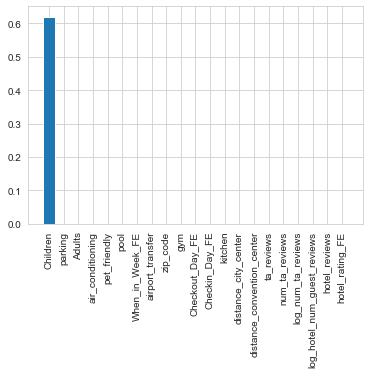

In [59]:
#https://note.com/hatimitsu2929/n/nb7257b749ac4
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k = 2)
X_new = selector.fit_transform(X, y)

feature_scores = list(zip(selector.pvalues_, X.columns))
sorted_feature_scores = sorted(feature_scores, reverse =True)

num_list = []
col_list = []

for i in range(21):
    num_list.append((sorted_feature_scores[i])[0])
    col_list.append((sorted_feature_scores[i])[1])
    
plt.bar(col_list, num_list)
plt.xticks(rotation = 'vertical')

In [60]:
print('p values: ', selector.pvalues_)

p values:  [9.32100408e-015 6.20373342e-001 1.30591339e-284 1.71939176e-286
 1.25946075e-184 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 2.36224763e-005 1.09401818e-030 6.72113216e-233
 1.53559028e-015 7.58380240e-023 3.90476955e-259 6.81612372e-109
 0.00000000e+000 0.00000000e+000 0.00000000e+000 6.58561271e-245
 6.58561271e-245 6.13144861e-031]


 # Feature Engineerting 2nd

- generate dummy data
- zip code is transformed into 'int' from 'str'

In [61]:
selected_attritbutes = ['Checkin', 'Checkout', 'Adults', 'Children', 'distance_city_center',
       'distance_convention_center', 'zip_code',
       'hotel_reviews', 'hotel_num_guest_reviews', 'num_ta_reviews',
       'ta_reviews', 'parking', 'pool', 'gym',
       'air_conditioning', 'pet_friendly', 'kitchen', 'airport_transfer',
       'log_hotel_num_guest_reviews', 'log_num_ta_reviews',
        'log_sales_price', 'hotel_rating_FE',
        'Checkin_Day_FE', 'Checkout_Day_FE', 'When_in_Week_FE']

sub_transformed_df = transformed_df[selected_attritbutes]
sub_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15897 entries, 0 to 19952
Data columns (total 25 columns):
Checkin                        15897 non-null object
Checkout                       15897 non-null object
Adults                         15897 non-null float64
Children                       15897 non-null float64
distance_city_center           15897 non-null float64
distance_convention_center     15897 non-null float64
zip_code                       15897 non-null int64
hotel_reviews                  15897 non-null float64
hotel_num_guest_reviews        15897 non-null float64
num_ta_reviews                 15897 non-null float64
ta_reviews                     15897 non-null float64
parking                        15897 non-null int64
pool                           15897 non-null int64
gym                            15897 non-null int64
air_conditioning               15897 non-null int64
pet_friendly                   15897 non-null int64
kitchen                        15897 non-

In [62]:
def get_insignificant_attributes(model):
    insignificant_attributes = []

    for i, pval in enumerate(model.pvalues):
        if pval > 0.05:
            insignificant_attributes.append(model.pvalues.index[i])
            print(model.pvalues.index[i], pval)
    return insignificant_attributes


In [63]:
sub_transformed_df.columns

Index(['Checkin', 'Checkout', 'Adults', 'Children', 'distance_city_center',
       'distance_convention_center', 'zip_code', 'hotel_reviews',
       'hotel_num_guest_reviews', 'num_ta_reviews', 'ta_reviews', 'parking',
       'pool', 'gym', 'air_conditioning', 'pet_friendly', 'kitchen',
       'airport_transfer', 'log_hotel_num_guest_reviews', 'log_num_ta_reviews',
       'log_sales_price', 'hotel_rating_FE', 'Checkin_Day_FE',
       'Checkout_Day_FE', 'When_in_Week_FE'],
      dtype='object')

### filter outliers

In [64]:
dummy_df = pd.get_dummies(sub_transformed_df, drop_first = True)
dummy_df.describe()

,Adults,Children,distance_city_center,distance_convention_center,zip_code,hotel_reviews,hotel_num_guest_reviews,num_ta_reviews,ta_reviews,parking,pool,gym,air_conditioning,pet_friendly,kitchen,airport_transfer,log_hotel_num_guest_reviews,log_num_ta_reviews,log_sales_price,hotel_rating_FE,Checkin_Day_FE,Checkout_Day_FE,When_in_Week_FE,Checkin_2019-11-04,Checkin_2019-11-06,...,Checkout_2019-11-15,Checkout_2019-11-17,Checkout_2019-11-20,Checkout_2019-11-22,Checkout_2019-11-24,Checkout_2019-11-27,Checkout_2019-11-29,Checkout_2019-12-01,Checkout_2019-12-04,Checkout_2019-12-06,Checkout_2019-12-08,Checkout_2019-12-11,Checkout_2019-12-13,Checkout_2019-12-15,Checkout_2019-12-18,Checkout_2019-12-20,Checkout_2019-12-22,Checkout_2019-12-25,Checkout_2019-12-27,Checkout_2019-12-29,Checkout_2020-01-01,Checkout_2020-01-05,Checkout_2020-01-08,Checkout_2020-01-10,Checkout_2020-01-12
count,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,...,15897.00000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.00000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.00000
mean,2.655092,0.637227,3.185406,3.538775,89108.772473,8.060741,2731.936969,4620.156885,3.896018,0.792980,0.749009,0.653771,0.790527,0.120400,0.176260,0.148141,6.718064,7.050847,4.873337,2.257596,2.037303,2.037303,1.962697,0.027112,0.027552,...,0.03617,0.035101,0.037995,0.036799,0.029943,0.037617,0.027678,0.032396,0.025665,0.033528,0.034849,0.036799,0.035856,0.035541,0.037240,0.036736,0.037114,0.036925,0.03617,0.033277,0.031012,0.036045,0.026546,0.025539,0.02944
std,0.938666,0.931907,2.759864,2.559087,33.770449,1.037201,4580.319752,8145.596795,0.556147,0.405183,0.433597,0.475782,0.406946,0.325439,0.381053,0.355251,1.714657,1.860414,0.703410,1.273845,0.838226,0.838226,0.792472,0.162415,0.163692,...,0.18672,0.184041,0.191189,0.188275,0.170435,0.190275,0.164054,0.177055,0.158139,0.180017,0.183404,0.188275,0.185936,0.185149,0.189355,0.188120,0.189047,0.188584,0.18672,0.179364,0.173356,0.186407,0.160757,0.157762,0.16904
min,2.000000,0.000000,0.100000,0.100000,89011.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,2.944439,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,1.100000,1.700000,89103.000000,7.400000,262.000000,397.000000,3.500000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.568345,5.983936,4.499810,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2.000000,0.000000,2.100000,2.700000,89109.000000,8.400000,868.000000,1124.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.766192,7.024649,4.875197,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,4.000000,2.000000,4.900000,5.300000,89119.000000,8.800000,2463.000000,3646.000000,4.500000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.

In [65]:
X = dummy_df.drop('log_sales_price', axis = 1)
y = dummy_df.loc[:, 'log_sales_price']
print(X.shape, y.shape)

import statsmodels.api as sm
statsmodel = sm.OLS(y, sm.add_constant(X))
fit_model = statsmodel.fit()
fit_model.summary2()

(15897, 80) (15897,)


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
=============================================================================
Model:                  OLS                 Adj. R-squared:        0.529     
Dependent Variable:     log_sales_price     AIC:                   22023.5636
Date:                   2020-10-26 14:09    BIC:                   22399.5840
No. Observations:       15897               Log-Likelihood:        -10963.   
Df Model:               48                  F-statistic:           372.3     
Df Residuals:           15848               Prob (F-statistic):    0.00      
R-squared:              0.530               Scale:                 0.23327   
-----------------------------------------------------------------------------
                             Coef.  Std.Err.    t     P>|t|   [0.025   0.975]
-----------------------------------------------------------------------------
const                       -5.3595   7.7443  -0.6921 0.4889 -20.5392  9.8201
Adults                       0.0987   0.0047  21.1627 0.0000   0.0895  0.1078
Children                     0.0623   0.0047  13.2115 0.0000   0.0531  0.0716
distance_city_center        -0.0918   0.0040 -22.7840 0.0000  -0.0997 -0.0839
distance_convention_center   0.0559   0.0042  13.3639 0.0000   0.0477  0.0641
zip_code                     0.0001   0.0001   1.0138 0.3107  -0.0001  0.0004
hotel_reviews                0.0606   0.0100   6.0768 0.0000   0.0411  0.0802
hotel_num_guest_reviews     -0.0000   0.0000 -12.4203 0.0000  -0.0000 -0.0000
num_ta_reviews               0.0000   0.0000  21.7651 0.0000   0.0000  0.0000
ta_reviews                   0.1816   0.0127  14.2586 0.0000   0.1566  0.2066
parking                      0.0235   0.0232   1.0157 0.3098  -0.0219  0.0690
pool                        -0.0702   0.0168  -4.1872 0.0000  -0.1031 -0.0373
gym                          0.0332   0.0148   2.2451 0.0248   0.0042  0.0621
air_conditioning             0.0717   0.0240   2.9896 0.0028   0.0247  0.1188
pet_friendly                 0.0242   0.0130   1.8577 0.0632  -0.0013  0.0498
kitchen                     -0.1016   0.0114  -8.8929 0.0000  -0.1240 -0.0792
airport_transfer            -0.0737   0.0115  -6.3830 0.0000  -0.0963 -0.0511
log_hotel_num_guest_reviews -0.1330   0.0041 -32.8255 0.0000  -0.1410 -0.1251
log_num_ta_reviews           0.0253   0.0041   6.1294 0.0000   0.0172  0.0334
hotel_rating_FE              0.0383   0.0067   5.7170 0.0000   0.0252  0.0515
Checkin_Day_FE              -0.0987   0.3419  -0.2888 0.7727  -0.7689  0.5714
Checkout_Day_FE             -0.0987   0.3419  -0.2888 0.7727  -0.7689  0.5714
When_in_Week_FE             -0.8987   1.1170  -0.8046 0.4211  -3.0882  1.2907
Checkin_2019-11-04          -0.6428   1.2421  -0.5175 0.6048  -3.0775  1.7919
Checkin_2019-11-06           0.4664   0.2170   2.1489 0.0317   0.0410  0.8917
Checkin_2019-11-08           0.0030   0.0148   0.2037 0.8386  -0.0261  0.0321
Checkin_2019-11-11          -0.9760   1.2421  -0.7858 0.4320  -3.4107  1.4587
Checkin_2019-11-13           0.0369   0.2169   0.1700 0.8650  -0.3884  0.4621
Checkin_2019-11-15          -0.1229   0.0146  -8.4196 0.0000  -0.1515 -0.0943
Checkin_2019-11-18          -0.9960   1.2421  -0.8019 0.4226  -3.4307  1.4387
Checkin_2019-11-20           0.0136   0.2170   0.0626 0.9501  -0.4118  0.4390
Checkin_2019-11-22          -0.1860   0.0153 -12.1877 0.0000  -0.2159 -0.1561
Checkin_2019-11-25          -1.0694   1.2421  -0.8610 0.3893  -3.5040  1.3653
Checkin_2019-11-27           0.0185   0.2170   0.0852 0.9321  -0.4068  0.4438
Checkin_2019-11-29          -0.1466   0.0150  -9.7510 0.0000  -0.1761 -0.1172
Checkin_2019-12-02          -0.9273   1.2421  -0.7466 0.4553  -3.3620  1.5073
Checkin_2019-12-04           0.1104   0.2170   0.5088 0.6109  -0.3149  0.5357
Checkin_2019-12-06          -0.1138   0.0148  -7.6905 0.0000  -0.1428 -0.0848
Checkin_2019-12-09          -0.9667   1.2421  -0.7783 0.4364  -3.4013  1.4

checkin_Day_FE, Checkin_Day_FE, When_in_Week_FE: P value > 0.05
FEの効果は低い、ダミー処理を試す
zip_code: str型からint型に変更したが、ダミー変数として扱う方がよさそう。
zip_codeを採用しない場合、位置情報を示す特徴量がなくなってしまう。

In [66]:
transformed_df.head()

,Checkin,Checkout,Adults,Children,distance_city_center,distance_convention_center,zip_code,hotel_rating,hotel_reviews,hotel_num_guest_reviews,num_ta_reviews,ta_reviews,slashed_price,sales_price,Checkin_Day,Checkout_Day,When_in_Week,parking,pool,gym,air_conditioning,pet_friendly,kitchen,airport_transfer,log_hotel_num_guest_reviews,log_num_ta_reviews,log_slashed_price,log_sales_price,hotel_rating_FE,Checkin_Day_FE,Checkout_Day_FE,When_in_Week_FE
0,2019-11-01,2019-11-03,2.0,2.0,6.2,5.3,89122,Fabulous,8.6,2339.0,2114.0,4.0,115.0,86.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,7.757479,7.656337,4.744932,4.454347,3,3,3,2
1,2019-11-01,2019-11-03,2.0,2.0,7.6,8.1,89144,No Rating,8.8,312.0,2316.0,4.0,349.0,199.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,5.743003,7.747597,5.855072,5.293305,0,3,3,2
2,2019-11-01,2019-11-03,2.0,2.0,0.6,1.2,89109,Very Good,8.2,18827.0,16513.0,4.0,262.0,184.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,9.843047,9.711903,5.568345,5.214936,2,3,3,2
4,2019-11-01,2019-11-03,2.0,2.0,6.4,5.5,89122,Very Good,8.4,2588.0,871.0,4.0,99.0,74.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,7.858641,6.769642,4.595120,4.304065,2,3,3,2
5,2019-11-01,2019-11-03,2.0,2.0,1.9,3.4,89103,Very Good,8.4,3870.0,6521.0,4.0,260.0,156.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,8.261010,8.782783,5.560682,5.049856,2,3,3,2


In [67]:
selected_attributes_2= ['Checkin', 'Checkout', 'Adults', 'Children', 'distance_city_center',
       'distance_convention_center', 'zip_code', 'hotel_rating',
       'hotel_reviews', 'ta_reviews', 'Checkin_Day',
       'Checkout_Day', 'When_in_Week', 'parking', 'pool', 'gym',
       'air_conditioning', 'pet_friendly', 'kitchen', 'airport_transfer',
       'log_hotel_num_guest_reviews', 'log_num_ta_reviews',
       'log_sales_price']

transformed_df['zip_code'] = transformed_df['zip_code'].astype(str)
sub_hotel_df_2 = transformed_df[selected_attributes_2]
sub_hotel_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15897 entries, 0 to 19952
Data columns (total 23 columns):
Checkin                        15897 non-null object
Checkout                       15897 non-null object
Adults                         15897 non-null float64
Children                       15897 non-null float64
distance_city_center           15897 non-null float64
distance_convention_center     15897 non-null float64
zip_code                       15897 non-null object
hotel_rating                   15897 non-null object
hotel_reviews                  15897 non-null float64
ta_reviews                     15897 non-null float64
Checkin_Day                    15897 non-null object
Checkout_Day                   15897 non-null object
When_in_Week                   15897 non-null object
parking                        15897 non-null int64
pool                           15897 non-null int64
gym                            15897 non-null int64
air_conditioning               15897 non

In [68]:
#https://deepage.net/features/pandas-get-dummies.html
sub_hotel_df_2_dummy = pd.get_dummies(sub_hotel_df_2, drop_first = True)
sub_hotel_df_2_dummy.head()

,Adults,Children,distance_city_center,distance_convention_center,hotel_reviews,ta_reviews,parking,pool,gym,air_conditioning,pet_friendly,kitchen,airport_transfer,log_hotel_num_guest_reviews,log_num_ta_reviews,log_sales_price,Checkin_2019-11-04,Checkin_2019-11-06,Checkin_2019-11-08,Checkin_2019-11-11,Checkin_2019-11-13,Checkin_2019-11-15,Checkin_2019-11-18,Checkin_2019-11-20,Checkin_2019-11-22,...,zip_code_89119,zip_code_89121,zip_code_89122,zip_code_89123,zip_code_89128,zip_code_89130,zip_code_89135,zip_code_89139,zip_code_89144,zip_code_89145,zip_code_89147,zip_code_89158,zip_code_89169,zip_code_89183,hotel_rating_Fabulous,hotel_rating_Good,hotel_rating_No Rating,hotel_rating_Superb,hotel_rating_Very Good,Checkin_Day_Monday,Checkin_Day_Wednesday,Checkout_Day_Sunday,Checkout_Day_Wednesday,When_in_Week_End of Week,When_in_Week_Weekend
0,2.0,2.0,6.2,5.3,8.6,4.0,1,1,1,1,0,0,0,7.757479,7.656337,4.454347,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,2.0,2.0,7.6,8.1,8.8,4.0,1,1,1,1,0,0,0,5.743003,7.747597,5.293305,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,2.0,2.0,0.6,1.2,8.2,4.0,1,1,1,1,0,0,0,9.843047,9.711903,5.214936,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,2.0,2.0,6.4,5.5,8.4,4.0,1,1,1,1,0,0,0,7.858641,6.769642,4.304065,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
5,2.0,2.0,1.9,3.4,8.4,4.0,1,1,1,1,0,0,0,8.261010,8.782783,5.049856,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [69]:
upper_log_price = filter_IQR(sub_hotel_df_2_dummy, 'log_sales_price')[0]
lower_log_price = filter_IQR(sub_hotel_df_2_dummy, 'log_sales_price')[1]

print(sub_hotel_df_2_dummy.shape)
sub_hotel_df_2_dummy = sub_hotel_df_2_dummy[(sub_hotel_df_2_dummy['log_sales_price'] > lower_log_price) & (sub_hotel_df_2_dummy['log_sales_price'] < upper_log_price)]
print(sub_hotel_df_2_dummy.shape)

(15897, 115)
(15063, 115)


In [70]:
model_df = sub_hotel_df_2_dummy.copy()

X = model_df.drop('log_sales_price', axis = 1)
y = model_df.loc[:, 'log_sales_price']
print(X.shape, y.shape)

#sm.add_constant: 定数項を追加する
statsmodel = sm.OLS(y, sm.add_constant(X))
fit_model = statsmodel.fit()
fit_model.summary2()

(15063, 114) (15063,)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                 OLS                 Adj. R-squared:        0.581     
Dependent Variable:    log_sales_price     AIC:                   12486.6837
Date:                  2020-10-26 14:09    BIC:                   13096.2834
No. Observations:      15063               Log-Likelihood:        -6163.3   
Df Model:              79                  F-statistic:           265.5     
Df Residuals:          14983               Prob (F-statistic):    0.00      
R-squared:             0.583               Scale:                 0.13343   
----------------------------------------------------------------------------
                             Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------------
const                        2.4210   0.0618  39.1442 0.0000  2.2998  2.5422
Adults                       0.0735   0.0036  20.2752 0.0000  0.0664  0.0806
Children                     0.0383   0.0037  10.4232 0.0000  0.0311  0.0455
distance_city_center        -0.1124   0.0056 -20.0872 0.0000 -0.1233 -0.1014
distance_convention_center   0.0722   0.0054  13.3250 0.0000  0.0616  0.0828
hotel_reviews                0.0635   0.0096   6.6375 0.0000  0.0447  0.0822
ta_reviews                   0.0898   0.0112   8.0463 0.0000  0.0679  0.1117
parking                     -0.0717   0.0192  -3.7236 0.0002 -0.1094 -0.0339
pool                        -0.1873   0.0138 -13.5532 0.0000 -0.2143 -0.1602
gym                          0.0893   0.0124   7.1953 0.0000  0.0650  0.1136
air_conditioning             0.1932   0.0207   9.3215 0.0000  0.1525  0.2338
pet_friendly                 0.0243   0.0102   2.3926 0.0167  0.0044  0.0442
kitchen                     -0.0665   0.0095  -7.0370 0.0000 -0.0851 -0.0480
airport_transfer            -0.0107   0.0104  -1.0248 0.3055 -0.0312  0.0098
log_hotel_num_guest_reviews -0.0829   0.0032 -26.1320 0.0000 -0.0891 -0.0767
log_num_ta_reviews           0.0390   0.0034  11.4737 0.0000  0.0323  0.0456
Checkin_2019-11-04           0.2632   0.0088  30.0392 0.0000  0.2460  0.2803
Checkin_2019-11-06           0.3762   0.0088  42.7973 0.0000  0.3589  0.3934
Checkin_2019-11-08           0.0048   0.0114   0.4208 0.6739 -0.0175  0.0271
Checkin_2019-11-11          -0.0377   0.0078  -4.8313 0.0000 -0.0529 -0.0224
Checkin_2019-11-13           0.0002   0.0078   0.0315 0.9748 -0.0151  0.0156
Checkin_2019-11-15          -0.1179   0.0112 -10.5562 0.0000 -0.1398 -0.0960
Checkin_2019-11-18          -0.0478   0.0077  -6.2062 0.0000 -0.0630 -0.0327
Checkin_2019-11-20          -0.0230   0.0079  -2.9234 0.0035 -0.0385 -0.0076
Checkin_2019-11-22          -0.1780   0.0117 -15.2645 0.0000 -0.2008 -0.1551
Checkin_2019-11-25          -0.1105   0.0078 -14.1116 0.0000 -0.1258 -0.0951
Checkin_2019-11-27          -0.0410   0.0087  -4.7178 0.0000 -0.0580 -0.0240
Checkin_2019-11-29          -0.1405   0.0115 -12.1974 0.0000 -0.1631 -0.1179
Checkin_2019-12-02           0.0116   0.0093   1.2502 0.2113 -0.0066  0.0298
Checkin_2019-12-04           0.0547   0.0081   6.7867 0.0000  0.0389  0.0705
Checkin_2019-12-06          -0.1061   0.0113  -9.3673 0.0000 -0.1283 -0.0839
Checkin_2019-12-09          -0.0341   0.0077  -4.4024 0.0000 -0.0492 -0.0189
Checkin_2019-12-11          -0.0239   0.0079  -3.0215 0.0025 -0.0395 -0.0084
Checkin_2019-12-13          -0.1809   0.0112 -16.2019 0.0000 -0.2027 -0.1590
Checkin_2019-12-16          -0.1095   0.0079 -13.9298 0.0000 -0.1249 -0.0941
Checkin_2019-12-18          -0.0872   0.0079 -11.0985 0.0000 -0.1026 -0.0718
Checkin_2019-12-20          -0.2543   0.0111 -22.8940 0.0000 -0.2761 -0.2325
Checkin_2019-12-23          -0.1044   0.0078 -13.3075 0.0000 -0.1198 -0.0890
Checkin_2019-12-25          -0.0655   0.0078  -8.3787 0.0000 -0.0808 -0.0502
Checkin_2019-12-27          -0.1178   0.0114 -1

In [71]:
insignificant_columns = get_insignificant_attributes(fit_model)
print(len(insignificant_columns))
insignificant_columns.append('log_sales_price')
print(len(insignificant_columns))

airport_transfer 0.3054775655852696
Checkin_2019-11-08 0.6739165410380487
Checkin_2019-11-13 0.9748490365192604
Checkin_2019-12-02 0.21125099311396733
Checkout_2019-11-10 0.6739165410380775
Checkout_2019-11-15 0.974849036519307
Checkout_2019-12-04 0.21125099311392584
zip_code_89032 0.08720815643033265
zip_code_89102 0.277098133984928
zip_code_89103 0.5452437509636746
zip_code_89104 0.16822603404848183
zip_code_89105 0.8548417694872331
zip_code_89107 0.21786954209898077
zip_code_89118 0.2050792561955261
zip_code_89119 0.5504801769885861
zip_code_89121 0.7180155436198862
zip_code_89130 0.42628529527361403
zip_code_89139 0.54159950316346
zip_code_89145 0.5749633049030101
zip_code_89147 0.24358801803732005
zip_code_89169 0.19922670915980895
21
22


In [72]:
print(model_df.shape)
X = model_df.drop(insignificant_columns, axis = 1)
y = model_df.loc[:, 'log_sales_price']
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

(15063, 115)
(15063, 93) (15063,)


## XGBoost

In [73]:
#'min_child_weigh': [1, 2],
params = {'eta': [0.01, 0.1, 1.0], 
                  'gamma': [0, 0.1],   
                  'n_estimators': [10, 100], 
                  'max_depth':[2, 4],   
                  'nthread': [2]}

mod = xgb.XGBRegressor()
cv = GridSearchCV(mod, params, cv = 5, scoring = 'r2', n_jobs = 1,verbose = 3)
#price is log values, it's hard to understand the accuracy from RMSE
#cv = GridSearchCV(mod, params, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = 1,verbose = 3)

cv_model = cv.fit(X_train, y_train)

y_train_pred = cv_model.predict(X_train)
y_test_pred = cv_model.predict(X_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] eta=0.01, gamma=0, max_depth=2, n_estimators=10, nthread=2 ......
[CV]  eta=0.01, gamma=0, max_depth=2, n_estimators=10, nthread=2, score=-47.339, total=   0.1s
[CV] eta=0.01, gamma=0, max_depth=2, n_estimators=10, nthread=2 ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  eta=0.01, gamma=0, max_depth=2, n_estimators=10, nthread=2, score=-45.926, total=   0.1s
[CV] eta=0.01, gamma=0, max_depth=2, n_estimators=10, nthread=2 ......
[CV]  eta=0.01, gamma=0, max_depth=2, n_estimators=10, nthread=2, score=-49.226, total=   0.1s
[CV] eta=0.01, gamma=0, max_depth=2, n_estimators=10, nthread=2 ......


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  eta=0.01, gamma=0, max_depth=2, n_estimators=10, nthread=2, score=-48.571, total=   0.1s
[CV] eta=0.01, gamma=0, max_depth=2, n_estimators=10, nthread=2 ......
[CV]  eta=0.01, gamma=0, max_depth=2, n_estimators=10, nthread=2, score=-49.014, total=   0.1s
[CV] eta=0.01, gamma=0, max_depth=2, n_estimators=100, nthread=2 .....
[CV]  eta=0.01, gamma=0, max_depth=2, n_estimators=100, nthread=2, score=-7.618, total=   0.8s
[CV] eta=0.01, gamma=0, max_depth=2, n_estimators=100, nthread=2 .....
[CV]  eta=0.01, gamma=0, max_depth=2, n_estimators=100, nthread=2, score=-7.439, total=   0.8s
[CV] eta=0.01, gamma=0, max_depth=2, n_estimators=100, nthread=2 .....
[CV]  eta=0.01, gamma=0, max_depth=2, n_estimators=100, nthread=2, score=-7.794, total=   0.7s
[CV] eta=0.01, gamma=0, max_depth=2, n_estimators=100, nthread=2 .....
[CV]  eta=0.01, gamma=0, max_depth=2, n_estimators=100, nthread=2, score=-7.778, total=   0.7s
[CV] eta=0.01, gamma=0, max_depth=2, n_estimators=100, nthread=2 .....
[CV]

[CV]  eta=0.1, gamma=0, max_depth=4, n_estimators=10, nthread=2, score=-6.924, total=   0.2s
[CV] eta=0.1, gamma=0, max_depth=4, n_estimators=10, nthread=2 .......
[CV]  eta=0.1, gamma=0, max_depth=4, n_estimators=10, nthread=2, score=-6.974, total=   0.2s
[CV] eta=0.1, gamma=0, max_depth=4, n_estimators=100, nthread=2 ......
[CV]  eta=0.1, gamma=0, max_depth=4, n_estimators=100, nthread=2, score=0.741, total=   1.3s
[CV] eta=0.1, gamma=0, max_depth=4, n_estimators=100, nthread=2 ......
[CV]  eta=0.1, gamma=0, max_depth=4, n_estimators=100, nthread=2, score=0.740, total=   1.4s
[CV] eta=0.1, gamma=0, max_depth=4, n_estimators=100, nthread=2 ......
[CV]  eta=0.1, gamma=0, max_depth=4, n_estimators=100, nthread=2, score=0.729, total=   1.3s
[CV] eta=0.1, gamma=0, max_depth=4, n_estimators=100, nthread=2 ......
[CV]  eta=0.1, gamma=0, max_depth=4, n_estimators=100, nthread=2, score=0.714, total=   1.3s
[CV] eta=0.1, gamma=0, max_depth=4, n_estimators=100, nthread=2 ......
[CV]  eta=0.1, g

[CV]  eta=1.0, gamma=0.1, max_depth=2, n_estimators=10, nthread=2, score=0.559, total=   0.1s
[CV] eta=1.0, gamma=0.1, max_depth=2, n_estimators=10, nthread=2 .....
[CV]  eta=1.0, gamma=0.1, max_depth=2, n_estimators=10, nthread=2, score=0.590, total=   0.1s
[CV] eta=1.0, gamma=0.1, max_depth=2, n_estimators=100, nthread=2 ....
[CV]  eta=1.0, gamma=0.1, max_depth=2, n_estimators=100, nthread=2, score=0.795, total=   0.7s
[CV] eta=1.0, gamma=0.1, max_depth=2, n_estimators=100, nthread=2 ....
[CV]  eta=1.0, gamma=0.1, max_depth=2, n_estimators=100, nthread=2, score=0.794, total=   0.7s
[CV] eta=1.0, gamma=0.1, max_depth=2, n_estimators=100, nthread=2 ....
[CV]  eta=1.0, gamma=0.1, max_depth=2, n_estimators=100, nthread=2, score=0.783, total=   0.7s
[CV] eta=1.0, gamma=0.1, max_depth=2, n_estimators=100, nthread=2 ....
[CV]  eta=1.0, gamma=0.1, max_depth=2, n_estimators=100, nthread=2, score=0.758, total=   0.7s
[CV] eta=1.0, gamma=0.1, max_depth=2, n_estimators=100, nthread=2 ....
[CV]  

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.2min finished


In [74]:
cv_result = pd.DataFrame.from_dict(cv_model.cv_results_)
cv_result[cv_result['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eta,param_gamma,param_max_depth,param_n_estimators,param_nthread,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
23,1.258484,0.013015,0.007872,0.000233,1,0.1,4,100,2,"{'eta': 1.0, 'gamma': 0.1, 'max_depth': 4, 'n_estimators': 100, 'nthread': 2}",0.844091,0.862386,0.84773,0.834,0.849349,0.847511,0.009154,1


In [94]:
r_squared = cv_result[cv_result['rank_test_score'] == 1]['mean_test_score']
print('R squared score: %.3f' % r_squared.values[0])
#print('R squared is ' + str(r2_score(y_test, y_test_pred)))
print('MAE: %.3f' % mean_absolute_error(np.exp(y_test), np.exp(y_test_pred)))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_test_pred))))

R squared score: 0.848
MAE: 18.009
RMSE: 31.273


## Random Forest

In [80]:
y_train.values.

array([4.63472899, 4.61512052, 5.41164605, ..., 4.97673374, 4.38202663,
       5.39362755])

In [96]:
from sklearn.ensemble import RandomForestRegressor

params = {'n_estimators' : [3, 10, 100, 1000],
                   'n_jobs': [-1],
                   'max_depth': [2, 5, 10, 25, 50, 100]}

rf = RandomForestRegressor()

cv = GridSearchCV(rf, params, cv = 5, scoring = 'r2', n_jobs = 1, verbose = 3)

rf_model = cv.fit(X_train, y_train)


y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] max_depth=2, n_estimators=3, n_jobs=-1 ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=2, n_estimators=3, n_jobs=-1, score=0.170, total=   9.2s
[CV] max_depth=2, n_estimators=3, n_jobs=-1 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.2s remaining:    0.0s


[CV]  max_depth=2, n_estimators=3, n_jobs=-1, score=0.188, total=   0.6s
[CV] max_depth=2, n_estimators=3, n_jobs=-1 ..........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.8s remaining:    0.0s


[CV]  max_depth=2, n_estimators=3, n_jobs=-1, score=0.189, total=   0.6s
[CV] max_depth=2, n_estimators=3, n_jobs=-1 ..........................
[CV]  max_depth=2, n_estimators=3, n_jobs=-1, score=0.178, total=   0.6s
[CV] max_depth=2, n_estimators=3, n_jobs=-1 ..........................
[CV]  max_depth=2, n_estimators=3, n_jobs=-1, score=0.169, total=   0.6s
[CV] max_depth=2, n_estimators=10, n_jobs=-1 .........................
[CV]  max_depth=2, n_estimators=10, n_jobs=-1, score=0.187, total=   0.2s
[CV] max_depth=2, n_estimators=10, n_jobs=-1 .........................
[CV]  max_depth=2, n_estimators=10, n_jobs=-1, score=0.186, total=   0.7s
[CV] max_depth=2, n_estimators=10, n_jobs=-1 .........................
[CV]  max_depth=2, n_estimators=10, n_jobs=-1, score=0.195, total=   0.2s
[CV] max_depth=2, n_estimators=10, n_jobs=-1 .........................
[CV]  max_depth=2, n_estimators=10, n_jobs=-1, score=0.198, total=   0.2s
[CV] max_depth=2, n_estimators=10, n_jobs=-1 ..............

[CV]  max_depth=10, n_estimators=1000, n_jobs=-1, score=0.702, total=   6.7s
[CV] max_depth=25, n_estimators=3, n_jobs=-1 .........................
[CV]  max_depth=25, n_estimators=3, n_jobs=-1, score=0.786, total=   0.2s
[CV] max_depth=25, n_estimators=3, n_jobs=-1 .........................
[CV]  max_depth=25, n_estimators=3, n_jobs=-1, score=0.811, total=   0.2s
[CV] max_depth=25, n_estimators=3, n_jobs=-1 .........................
[CV]  max_depth=25, n_estimators=3, n_jobs=-1, score=0.800, total=   0.2s
[CV] max_depth=25, n_estimators=3, n_jobs=-1 .........................
[CV]  max_depth=25, n_estimators=3, n_jobs=-1, score=0.799, total=   0.2s
[CV] max_depth=25, n_estimators=3, n_jobs=-1 .........................
[CV]  max_depth=25, n_estimators=3, n_jobs=-1, score=0.808, total=   0.2s
[CV] max_depth=25, n_estimators=10, n_jobs=-1 ........................
[CV]  max_depth=25, n_estimators=10, n_jobs=-1, score=0.820, total=   0.3s
[CV] max_depth=25, n_estimators=10, n_jobs=-1 ......

[CV]  max_depth=100, n_estimators=1000, n_jobs=-1, score=0.843, total=  17.1s
[CV] max_depth=100, n_estimators=1000, n_jobs=-1 .....................
[CV]  max_depth=100, n_estimators=1000, n_jobs=-1, score=0.882, total=  15.8s
[CV] max_depth=100, n_estimators=1000, n_jobs=-1 .....................
[CV]  max_depth=100, n_estimators=1000, n_jobs=-1, score=0.858, total=  18.9s
[CV] max_depth=100, n_estimators=1000, n_jobs=-1 .....................
[CV]  max_depth=100, n_estimators=1000, n_jobs=-1, score=0.847, total=  15.1s
[CV] max_depth=100, n_estimators=1000, n_jobs=-1 .....................
[CV]  max_depth=100, n_estimators=1000, n_jobs=-1, score=0.878, total=  15.3s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  5.8min finished


In [97]:
print('R squared: %.3f'  % r2_score(y_test, y_test_pred))
print('MAE: %.3f' % mean_absolute_error(np.exp(y_test), np.exp(y_test_pred)))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_test_pred))))

R squared: 0.883
MAE: 18.000
RMSE: 31.183


In [98]:
rf_model.best_params_

{'max_depth': 100, 'n_estimators': 1000, 'n_jobs': -1}

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] max_depth=2, n_estimators=3, n_jobs=-1 ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

## Simple Linear Regression

In [99]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_test_pred =lr_model.predict(X_test)

In [100]:
print('R squared: %.3f' % r2_score(y_test, y_test_pred))
print('MAE: %.3f' % mean_absolute_error(np.exp(y_test), np.exp(y_test_pred)))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_test_pred))))

R squared: 0.575
MAE: 40.772
RMSE: 62.915


## Support Vector Machine (SVM)

In [115]:
from sklearn.svm import SVR

params = {'C': np.logspace(-1, 2, 30)}

svm = SVR()

cv = GridSearchCV(svm, params, cv = 5, scoring = 'r2', n_jobs = 1, verbose = 3)
svm_model = cv.fit(X_train, y_train)

y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............................... C=0.1, score=0.570, total=   9.4s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.4s remaining:    0.0s
/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............................... C=0.1, score=0.566, total=   9.4s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.8s remaining:    0.0s
/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............................... C=0.1, score=0.561, total=   9.6s
[CV] C=0.1 ...........................................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............................... C=0.1, score=0.529, total=   9.4s
[CV] C=0.1 ...........................................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............................... C=0.1, score=0.569, total=   9.4s
[CV] C=0.12689610031679222 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.12689610031679222, score=0.596, total=   9.4s
[CV] C=0.12689610031679222 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.12689610031679222, score=0.596, total=   9.4s
[CV] C=0.12689610031679222 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.12689610031679222, score=0.589, total=   9.5s
[CV] C=0.12689610031679222 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.12689610031679222, score=0.557, total=   9.4s
[CV] C=0.12689610031679222 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.12689610031679222, score=0.596, total=   9.4s
[CV] C=0.16102620275609392 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.16102620275609392, score=0.619, total=   9.3s
[CV] C=0.16102620275609392 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.16102620275609392, score=0.622, total=   9.2s
[CV] C=0.16102620275609392 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.16102620275609392, score=0.612, total=   9.3s
[CV] C=0.16102620275609392 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.16102620275609392, score=0.581, total=   9.2s
[CV] C=0.16102620275609392 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.16102620275609392, score=0.621, total=   9.4s
[CV] C=0.20433597178569418 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.20433597178569418, score=0.639, total=   9.2s
[CV] C=0.20433597178569418 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.20433597178569418, score=0.642, total=   9.2s
[CV] C=0.20433597178569418 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.20433597178569418, score=0.633, total=   9.2s
[CV] C=0.20433597178569418 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.20433597178569418, score=0.602, total=   9.2s
[CV] C=0.20433597178569418 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.20433597178569418, score=0.642, total=   9.3s
[CV] C=0.2592943797404667 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=0.2592943797404667, score=0.656, total=   9.0s
[CV] C=0.2592943797404667 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=0.2592943797404667, score=0.660, total=   9.1s
[CV] C=0.2592943797404667 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=0.2592943797404667, score=0.650, total=   9.2s
[CV] C=0.2592943797404667 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=0.2592943797404667, score=0.620, total=   9.1s
[CV] C=0.2592943797404667 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=0.2592943797404667, score=0.659, total=   9.1s
[CV] C=0.32903445623126687 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.32903445623126687, score=0.671, total=   9.1s
[CV] C=0.32903445623126687 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.32903445623126687, score=0.676, total=   9.1s
[CV] C=0.32903445623126687 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.32903445623126687, score=0.667, total=   9.2s
[CV] C=0.32903445623126687 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.32903445623126687, score=0.637, total=   9.0s
[CV] C=0.32903445623126687 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.32903445623126687, score=0.675, total=   9.2s
[CV] C=0.41753189365604015 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.41753189365604015, score=0.686, total=   9.2s
[CV] C=0.41753189365604015 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.41753189365604015, score=0.690, total=   9.1s
[CV] C=0.41753189365604015 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.41753189365604015, score=0.682, total=   8.9s
[CV] C=0.41753189365604015 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.41753189365604015, score=0.652, total=   8.9s
[CV] C=0.41753189365604015 ...........................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............... C=0.41753189365604015, score=0.690, total=   9.0s
[CV] C=0.5298316906283709 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=0.5298316906283709, score=0.699, total=   8.9s
[CV] C=0.5298316906283709 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=0.5298316906283709, score=0.703, total=   8.9s
[CV] C=0.5298316906283709 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=0.5298316906283709, score=0.696, total=   8.9s
[CV] C=0.5298316906283709 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=0.5298316906283709, score=0.666, total=   8.8s
[CV] C=0.5298316906283709 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=0.5298316906283709, score=0.704, total=   9.0s
[CV] C=0.6723357536499337 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=0.6723357536499337, score=0.712, total=   8.9s
[CV] C=0.6723357536499337 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=0.6723357536499337, score=0.716, total=   8.9s
[CV] C=0.6723357536499337 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=0.6723357536499337, score=0.708, total=   8.9s
[CV] C=0.6723357536499337 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=0.6723357536499337, score=0.679, total=   8.8s
[CV] C=0.6723357536499337 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=0.6723357536499337, score=0.716, total=   8.9s
[CV] C=0.8531678524172808 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=0.8531678524172808, score=0.726, total=   8.7s
[CV] C=0.8531678524172808 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=0.8531678524172808, score=0.728, total=   8.9s
[CV] C=0.8531678524172808 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=0.8531678524172808, score=0.720, total=   9.0s
[CV] C=0.8531678524172808 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=0.8531678524172808, score=0.692, total=   8.8s
[CV] C=0.8531678524172808 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=0.8531678524172808, score=0.730, total=   8.8s
[CV] C=1.0826367338740546 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=1.0826367338740546, score=0.739, total=   8.8s
[CV] C=1.0826367338740546 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=1.0826367338740546, score=0.739, total=   8.9s
[CV] C=1.0826367338740546 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=1.0826367338740546, score=0.731, total=   8.9s
[CV] C=1.0826367338740546 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=1.0826367338740546, score=0.704, total=   8.8s
[CV] C=1.0826367338740546 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=1.0826367338740546, score=0.741, total=   8.9s
[CV] C=1.373823795883263 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=1.373823795883263, score=0.750, total=   8.9s
[CV] C=1.373823795883263 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=1.373823795883263, score=0.749, total=   8.8s
[CV] C=1.373823795883263 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=1.373823795883263, score=0.741, total=   9.3s
[CV] C=1.373823795883263 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=1.373823795883263, score=0.715, total=   9.2s
[CV] C=1.373823795883263 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=1.373823795883263, score=0.753, total=   9.1s
[CV] C=1.743328822199988 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=1.743328822199988, score=0.761, total=   9.0s
[CV] C=1.743328822199988 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=1.743328822199988, score=0.758, total=   9.2s
[CV] C=1.743328822199988 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=1.743328822199988, score=0.751, total=   9.1s
[CV] C=1.743328822199988 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=1.743328822199988, score=0.725, total=   9.1s
[CV] C=1.743328822199988 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=1.743328822199988, score=0.763, total=   9.0s
[CV] C=2.2122162910704493 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=2.2122162910704493, score=0.770, total=   9.1s
[CV] C=2.2122162910704493 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=2.2122162910704493, score=0.766, total=   9.2s
[CV] C=2.2122162910704493 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=2.2122162910704493, score=0.760, total=   9.2s
[CV] C=2.2122162910704493 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=2.2122162910704493, score=0.735, total=   9.0s
[CV] C=2.2122162910704493 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=2.2122162910704493, score=0.772, total=   9.1s
[CV] C=2.807216203941177 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=2.807216203941177, score=0.778, total=   9.3s
[CV] C=2.807216203941177 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=2.807216203941177, score=0.774, total=   9.3s
[CV] C=2.807216203941177 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=2.807216203941177, score=0.767, total=   9.3s
[CV] C=2.807216203941177 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=2.807216203941177, score=0.743, total=   9.1s
[CV] C=2.807216203941177 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=2.807216203941177, score=0.780, total=   9.1s
[CV] C=3.562247890262442 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=3.562247890262442, score=0.784, total=   9.2s
[CV] C=3.562247890262442 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=3.562247890262442, score=0.781, total=   9.3s
[CV] C=3.562247890262442 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=3.562247890262442, score=0.774, total=   9.2s
[CV] C=3.562247890262442 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=3.562247890262442, score=0.750, total=   9.1s
[CV] C=3.562247890262442 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=3.562247890262442, score=0.787, total=   9.3s
[CV] C=4.520353656360243 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=4.520353656360243, score=0.790, total=   9.7s
[CV] C=4.520353656360243 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=4.520353656360243, score=0.787, total=   9.3s
[CV] C=4.520353656360243 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=4.520353656360243, score=0.780, total=   9.4s
[CV] C=4.520353656360243 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=4.520353656360243, score=0.756, total=   9.4s
[CV] C=4.520353656360243 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=4.520353656360243, score=0.794, total=   9.7s
[CV] C=5.736152510448679 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=5.736152510448679, score=0.796, total=  10.0s
[CV] C=5.736152510448679 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=5.736152510448679, score=0.792, total=   9.7s
[CV] C=5.736152510448679 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=5.736152510448679, score=0.785, total=   9.8s
[CV] C=5.736152510448679 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=5.736152510448679, score=0.762, total=   9.5s
[CV] C=5.736152510448679 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=5.736152510448679, score=0.800, total=   9.6s
[CV] C=7.27895384398315 ..............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................. C=7.27895384398315, score=0.800, total=  10.1s
[CV] C=7.27895384398315 ..............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................. C=7.27895384398315, score=0.798, total=  10.0s
[CV] C=7.27895384398315 ..............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................. C=7.27895384398315, score=0.790, total=  10.0s
[CV] C=7.27895384398315 ..............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................. C=7.27895384398315, score=0.767, total=   9.8s
[CV] C=7.27895384398315 ..............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................. C=7.27895384398315, score=0.805, total=  10.0s
[CV] C=9.23670857187386 ..............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................. C=9.23670857187386, score=0.805, total=  10.5s
[CV] C=9.23670857187386 ..............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................. C=9.23670857187386, score=0.803, total=  10.5s
[CV] C=9.23670857187386 ..............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................. C=9.23670857187386, score=0.795, total=  10.7s
[CV] C=9.23670857187386 ..............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................. C=9.23670857187386, score=0.771, total=  10.3s
[CV] C=9.23670857187386 ..............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................. C=9.23670857187386, score=0.809, total=  10.7s
[CV] C=11.721022975334806 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=11.721022975334806, score=0.809, total=  11.2s
[CV] C=11.721022975334806 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=11.721022975334806, score=0.807, total=  11.1s
[CV] C=11.721022975334806 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=11.721022975334806, score=0.801, total=  11.3s
[CV] C=11.721022975334806 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=11.721022975334806, score=0.776, total=  10.9s
[CV] C=11.721022975334806 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=11.721022975334806, score=0.814, total=  11.3s
[CV] C=14.873521072935118 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=14.873521072935118, score=0.812, total=  11.8s
[CV] C=14.873521072935118 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=14.873521072935118, score=0.812, total=  12.0s
[CV] C=14.873521072935118 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=14.873521072935118, score=0.806, total=  12.0s
[CV] C=14.873521072935118 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=14.873521072935118, score=0.781, total=  11.7s
[CV] C=14.873521072935118 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=14.873521072935118, score=0.818, total=  12.0s
[CV] C=18.873918221350976 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=18.873918221350976, score=0.815, total=  12.8s
[CV] C=18.873918221350976 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=18.873918221350976, score=0.818, total=  12.8s
[CV] C=18.873918221350976 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=18.873918221350976, score=0.811, total=  13.0s
[CV] C=18.873918221350976 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=18.873918221350976, score=0.785, total=  12.7s
[CV] C=18.873918221350976 ............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=18.873918221350976, score=0.821, total=  13.1s
[CV] C=23.95026619987486 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=23.95026619987486, score=0.818, total=  14.3s
[CV] C=23.95026619987486 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=23.95026619987486, score=0.823, total=  14.5s
[CV] C=23.95026619987486 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=23.95026619987486, score=0.816, total=  14.1s
[CV] C=23.95026619987486 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=23.95026619987486, score=0.788, total=  14.3s
[CV] C=23.95026619987486 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=23.95026619987486, score=0.824, total=  14.3s
[CV] C=30.39195382313198 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=30.39195382313198, score=0.821, total=  15.9s
[CV] C=30.39195382313198 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=30.39195382313198, score=0.828, total=  16.6s
[CV] C=30.39195382313198 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=30.39195382313198, score=0.820, total=  16.1s
[CV] C=30.39195382313198 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=30.39195382313198, score=0.791, total=  16.7s
[CV] C=30.39195382313198 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=30.39195382313198, score=0.827, total=  16.4s
[CV] C=38.56620421163472 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=38.56620421163472, score=0.823, total=  19.1s
[CV] C=38.56620421163472 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=38.56620421163472, score=0.831, total=  19.3s
[CV] C=38.56620421163472 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=38.56620421163472, score=0.825, total=  19.4s
[CV] C=38.56620421163472 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=38.56620421163472, score=0.795, total=  18.8s
[CV] C=38.56620421163472 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=38.56620421163472, score=0.830, total=  19.0s
[CV] C=48.93900918477494 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=48.93900918477494, score=0.824, total=  21.9s
[CV] C=48.93900918477494 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=48.93900918477494, score=0.835, total=  22.8s
[CV] C=48.93900918477494 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=48.93900918477494, score=0.829, total=  22.3s
[CV] C=48.93900918477494 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=48.93900918477494, score=0.798, total=  20.8s
[CV] C=48.93900918477494 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=48.93900918477494, score=0.833, total=  22.2s
[CV] C=62.10169418915616 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=62.10169418915616, score=0.827, total=  26.6s
[CV] C=62.10169418915616 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=62.10169418915616, score=0.838, total=  27.4s
[CV] C=62.10169418915616 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=62.10169418915616, score=0.832, total=  25.9s
[CV] C=62.10169418915616 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=62.10169418915616, score=0.802, total=  25.5s
[CV] C=62.10169418915616 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=62.10169418915616, score=0.835, total=  26.4s
[CV] C=78.80462815669912 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=78.80462815669912, score=0.830, total=  31.3s
[CV] C=78.80462815669912 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=78.80462815669912, score=0.842, total=  31.8s
[CV] C=78.80462815669912 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=78.80462815669912, score=0.835, total=  30.7s
[CV] C=78.80462815669912 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=78.80462815669912, score=0.804, total=  29.3s
[CV] C=78.80462815669912 .............................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=78.80462815669912, score=0.837, total=  31.1s
[CV] C=100.0 .........................................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............................. C=100.0, score=0.832, total=  36.2s
[CV] C=100.0 .........................................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............................. C=100.0, score=0.846, total=  35.4s
[CV] C=100.0 .........................................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............................. C=100.0, score=0.837, total=  35.2s
[CV] C=100.0 .........................................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............................. C=100.0, score=0.807, total=  35.1s
[CV] C=100.0 .........................................................


/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............................. C=100.0, score=0.838, total=  38.0s


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 32.2min finished
/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [116]:
print('R squared: %.3f' % r2_score(y_test, y_test_pred))
print('MAE: %.3f' % mean_absolute_error(np.exp(y_test), np.exp(y_test_pred)))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_test_pred))))

R squared: 0.840
MAE: 23.959
RMSE: 38.709


In [122]:
sub_hotel_df_2.columns

Index(['Checkin', 'Checkout', 'Adults', 'Children', 'distance_city_center',
       'distance_convention_center', 'zip_code', 'hotel_rating',
       'hotel_reviews', 'ta_reviews', 'Checkin_Day', 'Checkout_Day',
       'When_in_Week', 'parking', 'pool', 'gym', 'air_conditioning',
       'pet_friendly', 'kitchen', 'airport_transfer',
       'log_hotel_num_guest_reviews', 'log_num_ta_reviews', 'log_sales_price'],
      dtype='object')

## Polynomial Linear Regression

In [147]:
sub_hotel_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15897 entries, 0 to 19952
Data columns (total 23 columns):
Checkin                        15897 non-null object
Checkout                       15897 non-null object
Adults                         15897 non-null float64
Children                       15897 non-null float64
distance_city_center           15897 non-null float64
distance_convention_center     15897 non-null float64
zip_code                       15897 non-null object
hotel_rating                   15897 non-null object
hotel_reviews                  15897 non-null float64
ta_reviews                     15897 non-null float64
Checkin_Day                    15897 non-null object
Checkout_Day                   15897 non-null object
When_in_Week                   15897 non-null object
parking                        15897 non-null int64
pool                           15897 non-null int64
gym                            15897 non-null int64
air_conditioning               15897 non

In [180]:
sub_hotel_df_3 = sub_hotel_df_2.drop('log_sales_price', axis = 1)
sub_hotel_df_3

,Checkin,Checkout,Adults,Children,distance_city_center,distance_convention_center,zip_code,hotel_rating,hotel_reviews,ta_reviews,Checkin_Day,Checkout_Day,When_in_Week,parking,pool,gym,air_conditioning,pet_friendly,kitchen,airport_transfer,log_hotel_num_guest_reviews,log_num_ta_reviews
0,2019-11-01,2019-11-03,2.0,2.0,6.2,5.3,89122,Fabulous,8.6,4.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,7.757479,7.656337
1,2019-11-01,2019-11-03,2.0,2.0,7.6,8.1,89144,No Rating,8.8,4.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,5.743003,7.747597
2,2019-11-01,2019-11-03,2.0,2.0,0.6,1.2,89109,Very Good,8.2,4.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,9.843047,9.711903
4,2019-11-01,2019-11-03,2.0,2.0,6.4,5.5,89122,Very Good,8.4,4.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,7.858641,6.769642
5,2019-11-01,2019-11-03,2.0,2.0,1.9,3.4,89103,Very Good,8.4,4.0,Friday,Sunday,Weekend,1,1,1,1,0,0,0,8.261010,8.782783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19937,2020-01-10,2020-01-12,2.0,0.0,4.3,2.6,89101,No Rating,4.8,4.5,Friday,Sunday,Weekend,1,0,0,0,1,0,0,3.367296,2.484907
19942,2020-01-10,2020-01-12,2.0,0.0,4.9,6.3,89139,Exceptional,9.6,4.5,Friday,Sunday,Weekend,1,1,1,1,1,0,0,2.944439,3.332205
19943,2020-01-10,2020-01-12,2.0,0.0,2.9,1.5,89104,No Rating,4.8,2.5,Friday,Sunday,Weekend,1,0,0,1,0,0,0,3.737670,2.302585
19944,2020-01-10,2020-01-12,2.0,0.0,8.6,9.5,89052,Superb,9.2,5.0,Friday,Sunday,Weekend,1,1,1,1,1,1,1,3.761200,0.693147


In [182]:
from sklearn.preprocessing import PolynomialFeatures

#degree = 2
categorical_attributes = ['parking', 'pool', 'gym', 'air_conditioning',
       'pet_friendly', 'kitchen', 'airport_transfer',]

numerical_attributes = ['Adults', 'Children', 'distance_city_center',
       'distance_convention_center', 'hotel_reviews', 
       'ta_reviews',  'log_hotel_num_guest_reviews', 'log_num_ta_reviews']

#sub_hotel_df_2_filterd = sub_hotel_df_2[(sub_hotel_df_2['log_sales_price'] > lower_log_price) & (sub_hotel_df_2['log_sales_price'] < upper_log_price)]

poly_cat_df = sub_hotel_df_3[categorical_attributes]
poly_num_df = sub_hotel_df_3[numerical_attributes]

poly = PolynomialFeatures(2)

In [175]:
X_poly = poly.fit_transform(poly_num_df)
X_poly_df = pd.DataFrame(data = X_poly, index = np.arange(0, len(X_poly)), columns = np.arange(1, 46))

X_poly_df_filterd = sub_hotel_df_3[(sub_hotel_df_3['log_sales_price'] > lower_log_price) & (sub_hotel_df_3['log_sales_price'] < upper_log_price)]

#hotel_poly_df = pd.DataFrame(X_poly_df).join(poly_cat_df)
#hotel_poly_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,...,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,parking,pool,gym,air_conditioning,pet_friendly,kitchen,airport_transfer
0,1.0,2.0,2.0,6.2,5.3,8.6,4.0,7.757479,7.656337,4.0,4.0,12.4,10.6,17.2,8.0,15.514958,15.312674,4.0,12.4,10.6,17.2,8.0,15.514958,15.312674,38.44,...,24.80,48.096368,47.469290,28.09,45.58,21.20,41.114637,40.578587,73.96,34.4,66.714317,65.844500,16.00,31.029915,30.625349,60.178477,59.393873,58.619499,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,1.0,2.0,2.0,7.6,8.1,8.8,4.0,5.743003,7.747597,4.0,4.0,15.2,16.2,17.6,8.0,11.486006,15.495194,4.0,15.2,16.2,17.6,8.0,11.486006,15.495194,57.76,...,30.40,43.646824,58.881736,65.61,71.28,32.40,46.518326,62.755534,77.44,35.2,50.538428,68.178852,16.00,22.972013,30.990387,32.982086,44.494473,60.025257,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,1.0,2.0,2.0,0.6,1.2,8.2,4.0,9.843047,9.711903,4.0,4.0,1.2,2.4,16.4,8.0,19.686095,19.423806,4.0,1.2,2.4,16.4,8.0,19.686095,19.423806,0.36,...,2.40,5.905828,5.827142,1.44,9.84,4.80,11.811657,11.654284,67.24,32.8,80.712988,79.637606,16.00,39.372189,38.847613,96.885580,95.594723,94.321064,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,1.0,2.0,2.0,6.4,5.5,8.4,4.0,7.858641,6.769642,4.0,4.0,12.8,11.0,16.8,8.0,15.717281,13.539284,4.0,12.8,11.0,16.8,8.0,15.717281,13.539284,40.96,...,25.60,50.295300,43.325709,30.25,46.20,22.00,43.222524,37.233031,70.56,33.6,66.012582,56.864993,16.00,31.434563,27.078568,61.758233,53.200184,45.828052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,2.0,2.0,1.9,3.4,8.4,4.0,8.261010,8.782783,4.0,4.0,3.8,6.8,16.8,8.0,16.522020,17.565566,4.0,3.8,6.8,16.8,8.0,16.522020,17.565566,3.61,...,7.60,15.695919,16.687288,11.56,28.56,13.60,28.087433,29.861462,70.56,33.6,69.392482,73.775377,16.00,33.044039,35.131132,68.244283,72.554656,77.137278,1.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15058,1.0,2.0,0.0,4.3,2.6,4.8,4.5,3.367296,2.484907,4.0,0.0,8.6,5.2,9.6,9.0,6.734592,4.969813,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,18.49,...,19.35,14.479372,10.685099,6.76,12.48,11.70,8.754969,6.460757,23.04,21.6,16.163020,11.927552,20.25,15.152831,11.182080,11.338681,8.367416,6.174761,1.0,0.0,0.0,1.0,0.0,0.0,0.0
15059,1.0,2.0,0.0,4.9,6.3,9.6,4.5,2.944439,3.332205,4.0,0.0,9.8,12.6,19.2,9.0,5.888878,6.664409,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,24.01,...,22.05,14.427751,16.327802,39.69,60.48,28.35,18.549966,20.992888,92.16,43.2,28.266614,31.989163,20.25,13.249975,14.994920,8.669721,9.811473,11.103587,1.0,1.0,1.0,1.0,1.0,0.0,0.0
15060,1.0,2.0,0.0,2.9,1.5,4.8,2.5,3.737670,2.302585,4.0,0.0,5.8,3.0,9.6,5.0,7.475339,4.605170,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,8.41,...,7.25,10.839242,6.677497,2.25,7.20,3.75,5.606504,3.453878,23.04,12.0,17.940814,11.052408,6.25,9.344174,5.756463,13.970174,8.606302,5.301898,1.0,1.0,1.0,1.0,0.0,0.0,0.0
15061,1.0,2.0,0.0,8.6,9.5,9.2,5.0,3.761200,0.693147,4.0,0.0,17.2,19.0,18.4,10.0,7.522400,1.386294,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,73.96,...,43.00,32.346321,5.961066,90.25,87.40,47.50,35.731401,6.584898,84.64,46.0,34.603041,6.376954,25.00,18.806001,3.465736,14.146626,2.607065,0.480453,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_poly_df, y, test_size = 0.3, random_state = 42)


poly_lr = LinearRegression()
poly_lr_model = poly_lr.fit(X_train, y_train)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [125]:
statsmodel_poly = sm.OLS(y, X_poly)
fit_model_poly = statsmodel_poly.fit() 
fit_model_poly.summary2()



/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/sakanashishunsuke/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.812     
Dependent Variable: log_sales_price  AIC:                1552.6014 
Date:               2020-10-26 17:53 BIC:                11428.1171
No. Observations:   15063            Log-Likelihood:     519.70    
Df Model:           1295             F-statistic:        51.33     
Df Residuals:       13767            Prob (F-statistic): 0.00      
R-squared:          0.828            Scale:              0.059790  
---------------------------------------------------------------------
         Coef.     Std.Err.      t       P>|t|     [0.025     0.975] 
---------------------------------------------------------------------
const    -3.1453     0.5153    -6.1037   0.0000    -4.1554    -2.1352
x1       -4.0093     0.6565    -6.1066   0.0000    -5.2962    -2.7224
x2        0.0047     0.0086     0.5485   0.5834    -0.0121     0.0215
x3        1.4290     0.2752     5.1932   0.0000     0.8896     1.9684
x4       -0.4100     0.2267    -1.8090   0.0705    -0.8543     0.0343
x5        1.7996     0.2893     6.2197   0.0000     1.2324     2.3667
x6       -1.5497     0.3334    -4.6488   0.0000    -2.2031    -0.8963
x7        0.3888     0.0842     4.6173   0.0000     0.2238     0.5539
x8       -1.3698     0.2092    -6.5487   0.0000    -1.7798    -0.9598
x9       -0.2097     0.0853    -2.4569   0.0140    -0.3769    -0.0424
x10      -0.5117     0.1497    -3.4182   0.0006    -0.8051    -0.2183
x11      -0.1589     0.0897    -1.7711   0.0766    -0.3347     0.0170
x12      -4.0479     0.6366    -6.3587   0.0000    -5.2957    -2.8001
x13       0.2082     0.0833     2.4996   0.0124     0.0449     0.3714
x14       0.6550     0.1144     5.7239   0.0000     0.4307     0.8793
x15       0.1704     0.0770     2.2121   0.0270     0.0194     0.3215
x16       0.0248     0.0735     0.3369   0.7362    -0.1194     0.1689
x17       0.1448     0.0741     1.9541   0.0507    -0.0005     0.2900
x18       0.0399     0.0466     0.8561   0.3920    -0.0514     0.1312
x19       0.0273     0.0733     0.3717   0.7101    -0.1165     0.1710
x20      -0.0363     0.0564    -0.6434   0.5200    -0.1468     0.0743
x21       0.0015     0.0501     0.0294   0.9766    -0.0966     0.0996
x22       0.2230     0.0775     2.8786   0.0040     0.0712     0.3749
x23      -0.0040     0.0582    -0.0683   0.9456    -0.1181     0.1102
x24       0.0610     0.0528     1.1553   0.2480    -0.0425     0.1646
x25      -0.0541     0.0576    -0.9390   0.3477    -0.1671     0.0589
x26       0.0393     0.0561     0.6997   0.4841    -0.0708     0.1493
x27       0.1833     0.0773     2.3696   0.0178     0.0317     0.3349
x28      -0.0426     0.0532    -0.8010   0.4231    -0.1468     0.0616
x29       0.0125     0.0447     0.2797   0.7797    -0.0751     0.1001
x30       0.1720     0.0724     2.3747   0.0176     0.0300     0.3139
x31       0.0913     0.0602     1.5183   0.1289    -0.0266     0.2093
x32       0.0290     0.0460     0.6297   0.5289    -0.0612     0.1191
x33       0.2150     0.0730     2.9469   0.0032     0.0720     0.3580
x34       0.1012     0.0678     1.4933   0.1354    -0.0316     0.2340
x35       0.1776     0.0483     3.6750   0.0002     0.0829     0.2723
x36       0.3070     0.0808     3.8010   0.0001     0.1487     0.4653
x37       0.1136     0.0457     2.4869   0.0129     0.0241     0.2031
x38       0.3283     0.0789     4.1601   0.0000     0.1736     0.4829
x39       0.0758     0.0627     1.2087   0.2268    -0.0471     0.1986
x40       0.0734     0.0473     1.5518   0.1207    -0.0193     0.1662
x41       0.1704     0.0770     2.2121   0.0270     0.0194     0.3215
x42       0.0248     0.0735     0.3369   0.7362    -0.1194     0.1689
x43       0.1448     0.0741     1.9541   0.0507    -0.0005     0.2900
x44       0.0399     0.0466     0.8561   0.3920    -0.0514     0.13

In [ ]:
y_train_pred = poly_lr_model.predict(X_train)
y_test_pred = poly_lr_model.predict(X_test)

In [ ]:
print('R squared: %.3f'  % r2_score(y_test, y_test_pred))
print('MAE: %.3f' % mean_absolute_error(np.exp(y_test), np.exp(y_test_pred)))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_test_pred))))